<a href="https://colab.research.google.com/github/harpreetahluwalia/ML-Budling-Value-Predict/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
#pip install fancyimpute

In [4]:
pip install googlemaps


In [5]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
SGIDataset = '/content/drive/MyDrive/SGIDataset/DataSet - CANDIDATE COPY.xlsx'
data = pd.read_excel(SGIDataset)

In [7]:
df_1 = data.copy()

In [8]:
df_1.head()

HABID Province                  QuoteDate    EffDate PostalCode  \
0  48816840       AB  01OCT2024:00:04:00.000000 2024-10-04     T4X1A4   
1  48816886       ON  01OCT2024:00:50:00.000000 2024-10-17     L6R1K5   
2  48816906       ON  01OCT2024:00:44:00.000000 2024-10-11     L2H0K9   
3  48816910       ON  01OCT2024:00:04:00.000000 2024-09-25     P3P0A9   
4  48816928       ON  01OCT2024:01:52:00.000000 2024-10-07     L4H3C1   

  Protection DwellingType BuildingStyle ElectricalType ElectricalWiringType  \
0    Hydrant   Homeowners      DETACHED        100 AMP               COPPER   
1    Hydrant   Homeowners      DETACHED        100 AMP               COPPER   
2        NaN   Homeowners     TOWNHOUSE        200 AMP               COPPER   
3    Hydrant   Homeowners      DETACHED        200 AMP               COPPER   
4    Hydrant   Homeowners      DETACHED        200 AMP               COPPER   

   ... EXTERIORFINISH NUMFULLBATHS NUMHALFBATHS FINISHEDBASEMENTPERC  \
0  ...          Vinyl          2.0          0.0                100.0   
1  ...   Brick Veneer          3.0          1.0                100.0   
2  ...   Brick Veneer          2.0          1.0                  0.0   
3  ...   Brick Veneer          3.0          NaN                100.0   
4  ...   Brick Veneer          2.0          1.0                100.0   

           ROOFTYPE HasSepticSystem GarageType PlumbingType  \
0  ASPHALT SHINGLES               0        NaN       COPPER   
1  ASPHALT SHINGLES               0   Built-In       COPPER   
2  ASPHALT SHINGLES               0   Built-In       COPPER   
3  ASPHALT SHINGLES               0        NaN          PEX   
4  ASPHALT SHINGLES               0   Built-In          ABS   

  NumberOfCarsGarage  HydrantDistance  
0                NaN            150.0  
1                1.0            300.0  
2                1.0            150.0  
3                2.0            300.0  
4                1.0            150.0  

[5 rows x 70 columns]

In [9]:
df_1.shape

(122064, 70)

In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122064 entries, 0 to 122063
Data columns (total 70 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   HABID                      122064 non-null  int64         
 1   Province                   122064 non-null  object        
 2   QuoteDate                  122064 non-null  object        
 3   EffDate                    122064 non-null  datetime64[ns]
 4   PostalCode                 122064 non-null  object        
 5   Protection                 117971 non-null  object        
 6   DwellingType               122064 non-null  object        
 7   BuildingStyle              121944 non-null  object        
 8   ElectricalType             118527 non-null  object        
 9   ElectricalWiringType       118740 non-null  object        
 10  PrimaryHeat                122040 non-null  object        
 11  PrimaryHeatDate            121970 non-null  datetime

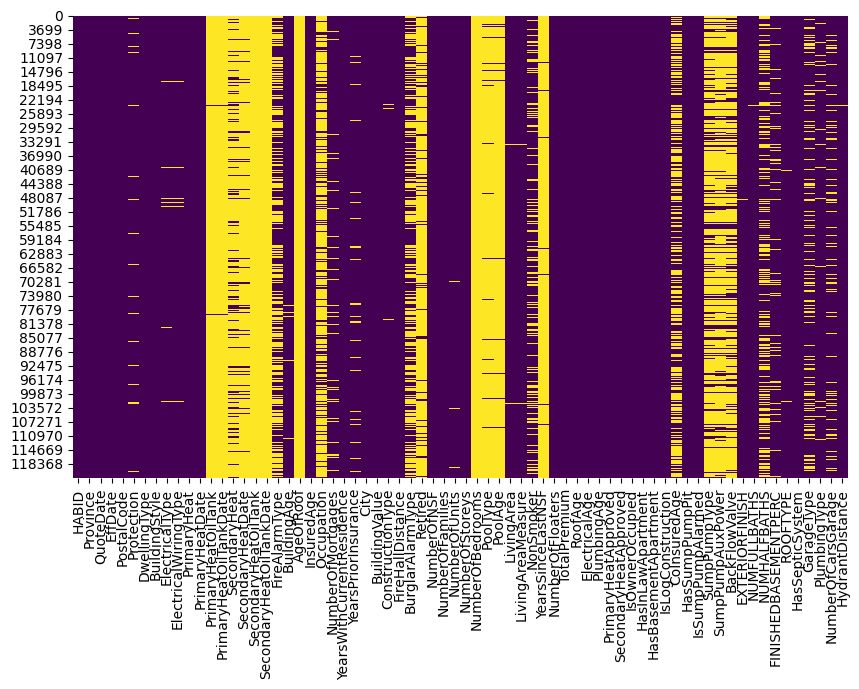

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df_1.isnull(), cbar=False, cmap='viridis', xticklabels=True)
plt.show()

In [12]:
missing_val_features = [f for f in df_1.columns if df_1[f].isnull().sum() > 0]

In [13]:
features_to_be_dropped = pd.DataFrame(columns=["Feature", "Missing Percentage"])
for feature in missing_val_features:
    per = 0
    print("The missing values in {} is {}%".format(feature,np.round(df_1[feature].isnull().mean()*100,2)))
    per = np.round(df_1[feature].isnull().mean()*100,2)
    if per >= 90:
      features_to_be_dropped = pd.concat([features_to_be_dropped, pd.DataFrame({"Feature":[feature], "Missing Percentage":[per]})], ignore_index=True)


The missing values in Protection is 3.35%
The missing values in BuildingStyle is 0.1%
The missing values in ElectricalType is 2.9%
The missing values in ElectricalWiringType is 2.72%
The missing values in PrimaryHeat is 0.02%
The missing values in PrimaryHeatDate is 0.08%
The missing values in PrimaryHeatOilTank is 99.25%
The missing values in PrimaryHeatOilTankDate is 99.24%
The missing values in SecondaryHeat is 79.47%
The missing values in SecondaryHeatDate is 91.92%
The missing values in SecondaryHeatOilTank is 99.98%
The missing values in SecondaryHeatOilTankDate is 99.98%
The missing values in FireAlarmType is 42.14%
The missing values in BuildingAge is 0.9%
The missing values in AgeOfRoof is 100.0%
The missing values in InsuredAge is 0.05%
The missing values in Occupation is 76.14%
The missing values in NumberOfMortgages is 7.61%
The missing values in YearsWithCurrentResidence is 0.04%
The missing values in YearsPriorInsurance is 5.27%
The missing values in ConstructionType is 0

<ipython-input-13-5b49ea486559>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  features_to_be_dropped = pd.concat([features_to_be_dropped, pd.DataFrame({"Feature":[feature], "Missing Percentage":[per]})], ignore_index=True)


The missing values in Retired is 91.71%
The missing values in NumberOfUnits is 1.14%
The missing values in NumberOfStoreys is 0.12%
The missing values in NumberOfBedrooms is 100.0%
The missing values in PoolType is 94.54%
The missing values in PoolAge is 96.61%
The missing values in LivingArea is 0.38%
The missing values in LivingAreaMeasure is 0.4%
The missing values in NonSmoker is 24.73%
The missing values in YearsSinceLastNSF is 98.74%
The missing values in RoofAge is 0.0%
The missing values in ElectricalAge is 0.01%
The missing values in PlumbingAge is 0.01%
The missing values in CoInsuredAge is 48.74%
The missing values in SumpPumpType is 72.97%
The missing values in SumpPumpAuxPower is 80.36%
The missing values in BackFlowValve is 76.07%
The missing values in EXTERIORFINISH is 0.19%
The missing values in NUMFULLBATHS is 1.02%
The missing values in NUMHALFBATHS is 35.38%
The missing values in FINISHEDBASEMENTPERC is 8.77%
The missing values in ROOFTYPE is 0.41%
The missing values

In [14]:
features_to_be_dropped.sort_values(by="Missing Percentage", ascending=False)

Feature  Missing Percentage
5                  AgeOfRoof              100.00
7           NumberOfBedrooms              100.00
3       SecondaryHeatOilTank               99.98
4   SecondaryHeatOilTankDate               99.98
0         PrimaryHeatOilTank               99.25
1     PrimaryHeatOilTankDate               99.24
10         YearsSinceLastNSF               98.74
9                    PoolAge               96.61
8                   PoolType               94.54
2          SecondaryHeatDate               91.92
6                    Retired               91.71

In [15]:
pip install fancyimpute

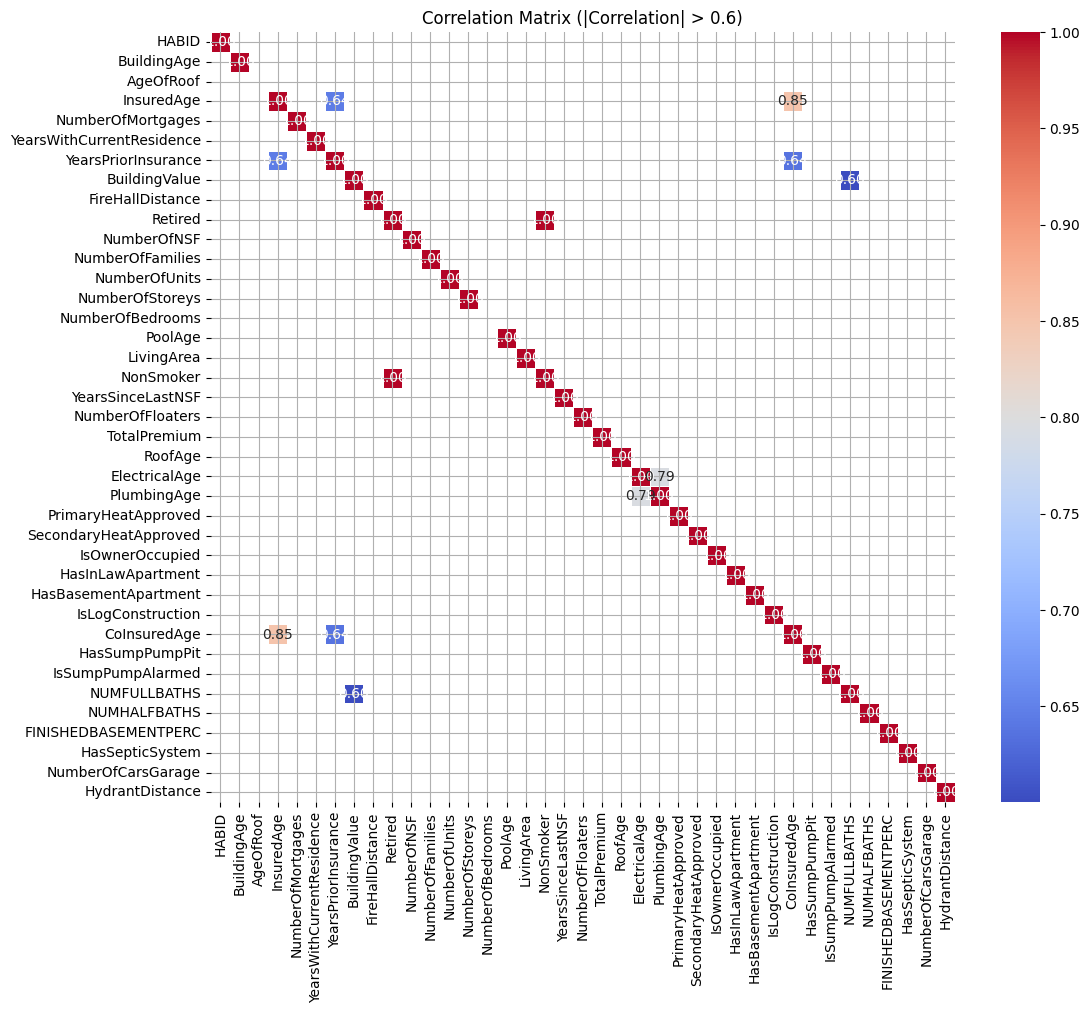

In [16]:
# prompt: plot correlation and only show greater than 0.6 , also show gridlines

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_1' is your DataFrame
correlation_matrix = df_1.corr(numeric_only=True)

# Filter correlations greater than 0.6 (absolute value)
filtered_correlation = correlation_matrix[abs(correlation_matrix) > 0.6]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (|Correlation| > 0.6)')
plt.grid(True) # Show gridlines
plt.show()


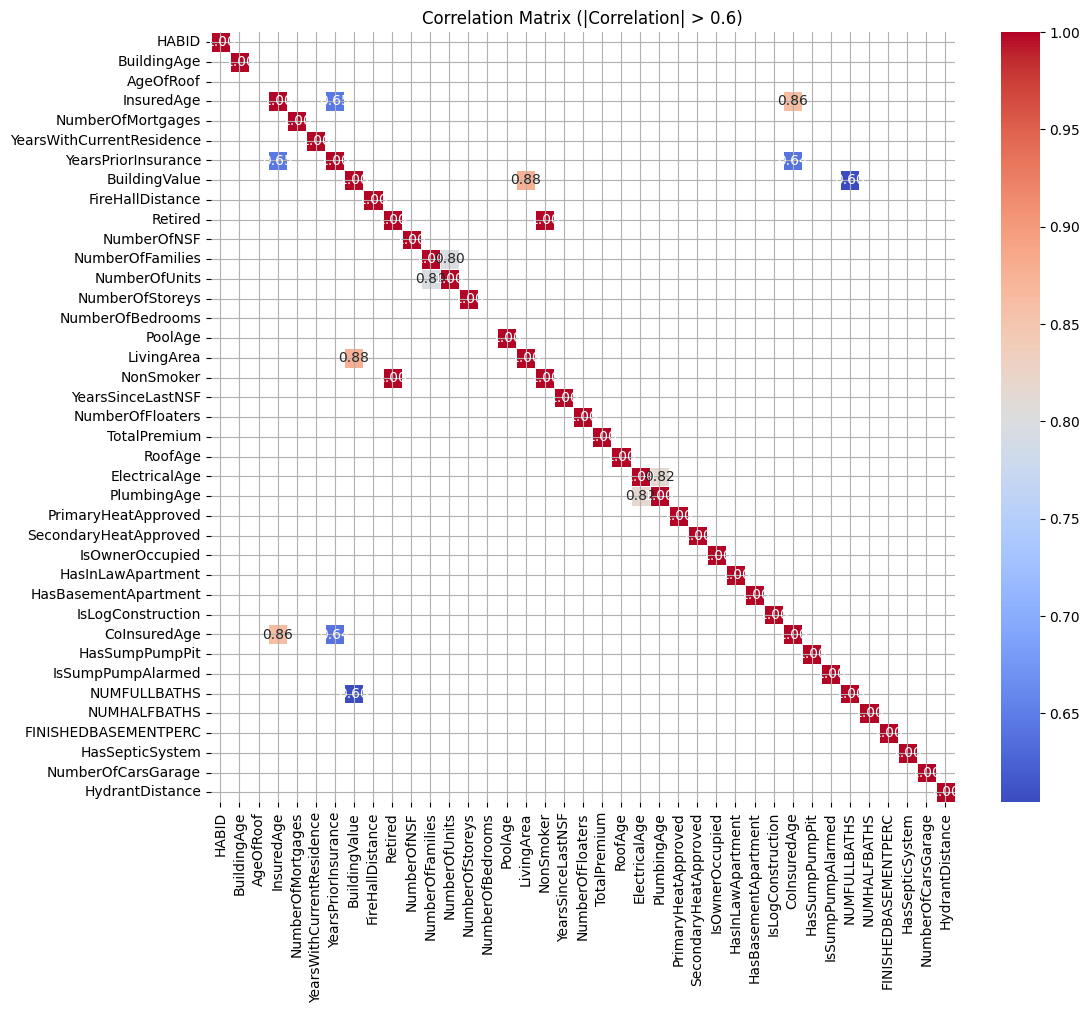

In [17]:
# prompt: plot correlation and only show greater than 0.6 , also show gridlines

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_1' is your DataFrame
correlation_matrix = df_1.corr(numeric_only=True, method='spearman')

# Filter correlations greater than 0.6 (absolute value)
filtered_correlation = correlation_matrix[abs(correlation_matrix) > 0.6]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (|Correlation| > 0.6)')
plt.grid(True) # Show gridlines
plt.show()


In [18]:
# prompt: print correlated numerical columns along with their correlation coffiecient greater than 0.5 and assign them to a list

import pandas as pd

# Assuming 'df_1' is your DataFrame (as defined in the previous code)
correlation_matrix = df_1.corr(numeric_only=True)

# Find highly correlated numerical columns
correlated_columns = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.5:
            correlated_columns.append((col1, col2, correlation_matrix.loc[col1, col2]))

# Print the correlated columns and their correlation coefficients
print("Correlated Columns (Correlation > 0.5):")
for col1, col2, corr in correlated_columns:
    print(f"Columns: {col1} and {col2}, Correlation: {corr}")

# Assign the correlated column pairs to a list (optional)
correlated_column_pairs = [(col1, col2) for col1, col2, _ in correlated_columns]
print("\nList of correlated column pairs:", correlated_column_pairs)


Correlated Columns (Correlation > 0.5):
Columns: InsuredAge and YearsPriorInsurance, Correlation: 0.6446073002143774
Columns: InsuredAge and CoInsuredAge, Correlation: 0.8501403372245929
Columns: YearsPriorInsurance and InsuredAge, Correlation: 0.6446073002143774
Columns: YearsPriorInsurance and CoInsuredAge, Correlation: 0.6373656799420696
Columns: BuildingValue and NUMFULLBATHS, Correlation: 0.6001999190389825
Columns: Retired and NonSmoker, Correlation: 1.0
Columns: NonSmoker and Retired, Correlation: 1.0
Columns: ElectricalAge and PlumbingAge, Correlation: 0.794967416280309
Columns: PlumbingAge and ElectricalAge, Correlation: 0.794967416280309
Columns: CoInsuredAge and InsuredAge, Correlation: 0.8501403372245929
Columns: CoInsuredAge and YearsPriorInsurance, Correlation: 0.6373656799420696
Columns: NUMFULLBATHS and BuildingValue, Correlation: 0.6001999190389825

List of correlated column pairs: [('InsuredAge', 'YearsPriorInsurance'), ('InsuredAge', 'CoInsuredAge'), ('YearsPriorInsu

In [19]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r-1, k-1))

# Example: Check correlation between PoolType & BuildingStyle
cramers_v(df_1['FireAlarmType'], df_1['BurglarAlarmType'])

0.672330842488909

In [20]:
# prompt: list all categorical and numerical features into two lists of df_1

# Assuming df_1 is already defined as in your provided code

categorical_features = df_1.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = df_1.select_dtypes(include=['number']).columns.tolist()

print("Categorical Features:", categorical_features)
print("\nNumerical Features:", numerical_features)


Categorical Features: ['Province', 'QuoteDate', 'PostalCode', 'Protection', 'DwellingType', 'BuildingStyle', 'ElectricalType', 'ElectricalWiringType', 'PrimaryHeat', 'PrimaryHeatOilTank', 'SecondaryHeat', 'SecondaryHeatOilTank', 'FireAlarmType', 'Occupation', 'City', 'ConstructionType', 'BurglarAlarmType', 'PoolType', 'LivingAreaMeasure', 'SumpPumpType', 'SumpPumpAuxPower', 'BackFlowValve', 'EXTERIORFINISH', 'ROOFTYPE', 'GarageType', 'PlumbingType']

Numerical Features: ['HABID', 'BuildingAge', 'AgeOfRoof', 'InsuredAge', 'NumberOfMortgages', 'YearsWithCurrentResidence', 'YearsPriorInsurance', 'BuildingValue', 'FireHallDistance', 'Retired', 'NumberOfNSF', 'NumberOfFamilies', 'NumberOfUnits', 'NumberOfStoreys', 'NumberOfBedrooms', 'PoolAge', 'LivingArea', 'NonSmoker', 'YearsSinceLastNSF', 'NumberOfFloaters', 'TotalPremium', 'RoofAge', 'ElectricalAge', 'PlumbingAge', 'PrimaryHeatApproved', 'SecondaryHeatApproved', 'IsOwnerOccupied', 'HasInLawApartment', 'HasBasementApartment', 'IsLogConst

In [21]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

def cramers_v(x, y):
    """Compute Cramér's V statistic for categorical feature association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r-1, k-1)) if min(r-1, k-1) > 0 else 0

# Identify categorical features
categorical_features = [
    'DwellingType', 'BuildingStyle', 'ConstructionType', 'GarageType',
    'FireAlarmType', 'BurglarAlarmType', 'PrimaryHeat', 'SecondaryHeat',
    'PoolType', 'IsOwnerOccupied', 'HasInLawApartment', 'HasBasementApartment',
    'IsLogConstruction', 'NonSmoker', 'Retired'
]

# Compute Cramér's V for all categorical feature pairs
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  # Self-correlation is always 1
        else:
            try:
                cramers_v_matrix.loc[col1, col2] = cramers_v(df_1[col1], df_1[col2])
            except:
                cramers_v_matrix.loc[col1, col2] = np.nan  # Handle errors gracefully

# Convert to float for numerical operations
cramers_v_matrix = cramers_v_matrix.astype(float)

# Display correlation matrix
#print(cramers_v_matrix)

# Identify Strongly Correlated Pairs (Threshold: 0.3+ for moderate, 0.5+ for strong)
strong_correlations = []
threshold = 0.1  # Adjust based on use case

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 != col2 and cramers_v_matrix.loc[col1, col2] >= threshold:
            strong_correlations.append((col1, col2, cramers_v_matrix.loc[col1, col2]))

# Display strong correlations
strong_correlations_df = pd.DataFrame(strong_correlations, columns=['Feature1', 'Feature2', 'Cramer_V'])
print("\n🔹 **Strongly Correlated Categorical Features** 🔹")
print(strong_correlations_df.sort_values(by='Cramer_V', ascending=False))


🔹 **Strongly Correlated Categorical Features** 🔹
             Feature1           Feature2  Cramer_V
1    ConstructionType  IsLogConstruction  0.946524
15  IsLogConstruction   ConstructionType  0.946524
2       FireAlarmType   BurglarAlarmType  0.672331
4    BurglarAlarmType      FireAlarmType  0.672331
19            Retired          NonSmoker  0.499942
18          NonSmoker            Retired  0.499942
14    IsOwnerOccupied   ConstructionType  0.160712
0    ConstructionType    IsOwnerOccupied  0.160712
9       SecondaryHeat           PoolType  0.159033
13           PoolType      SecondaryHeat  0.159033
17  IsLogConstruction      SecondaryHeat  0.134008
10      SecondaryHeat  IsLogConstruction  0.134008
12           PoolType   BurglarAlarmType  0.129591
5    BurglarAlarmType           PoolType  0.129591
8       SecondaryHeat        PrimaryHeat  0.122561
6         PrimaryHeat      SecondaryHeat  0.122561
11           PoolType      FireAlarmType  0.117082
3       FireAlarmType           

In [22]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r-1, k-1))

# Example: Check correlation between PoolType & BuildingStyle
cramers_v(df_1['ConstructionType'],df_1['IsLogConstruction'])

0.9465242464212609

In [23]:
correlated_column_pairs


[('InsuredAge', 'YearsPriorInsurance'),
 ('InsuredAge', 'CoInsuredAge'),
 ('YearsPriorInsurance', 'InsuredAge'),
 ('YearsPriorInsurance', 'CoInsuredAge'),
 ('BuildingValue', 'NUMFULLBATHS'),
 ('Retired', 'NonSmoker'),
 ('NonSmoker', 'Retired'),
 ('ElectricalAge', 'PlumbingAge'),
 ('PlumbingAge', 'ElectricalAge'),
 ('CoInsuredAge', 'InsuredAge'),
 ('CoInsuredAge', 'YearsPriorInsurance'),
 ('NUMFULLBATHS', 'BuildingValue')]

In [24]:
# prompt: impute NonSmoker 0 where null or missing

# Impute 'NonSmoker' with 0 where it's null or missing
df_1['NonSmoker'] = df_1['NonSmoker'].fillna(0)

In [25]:
# prompt: drop columns with features_to_be_dropped

# Drop the columns identified in features_to_be_dropped
df_1 = df_1.drop(columns=features_to_be_dropped['Feature'].tolist())


In [26]:
# prompt: impute missing values in InsuredAge,YearsPriorInsurance,YearsPriorInsurance,NUMFULLBATHS,ElectricalAge,PlumbingAge,NUMFULLBATHS using ML

import pandas as pd
from fancyimpute import IterativeImputer
df_2 = df_1.copy()
# Create a subset of the DataFrame with the columns you want to impute
cols_to_impute = ['InsuredAge', 'RoofAge','YearsPriorInsurance', 'ElectricalAge', 'PlumbingAge','BuildingAge']
df_impute = df_2[cols_to_impute].copy()

# Initialize the IterativeImputer
imputer = IterativeImputer(random_state=42)  # You can adjust the random_state

# Fit and transform the imputer on the selected columns
df_imputed = imputer.fit_transform(df_impute)

# Create a new DataFrame with imputed values
df_imputed = pd.DataFrame(df_imputed, columns=cols_to_impute)

# Replace the original columns in df_2 with the imputed values
df_2[cols_to_impute] = df_imputed

# Now df_2 has the imputed values for the specified columns.


In [27]:
df_2[cols_to_impute].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122064 entries, 0 to 122063
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   InsuredAge           122064 non-null  float64
 1   RoofAge              122064 non-null  float64
 2   YearsPriorInsurance  122064 non-null  float64
 3   ElectricalAge        122064 non-null  float64
 4   PlumbingAge          122064 non-null  float64
 5   BuildingAge          122064 non-null  float64
dtypes: float64(6)
memory usage: 5.6 MB


In [28]:
numerical_columns_to_impute_mean = ['BuildingAge', 'FireHallDistance', 'LivingArea', 'RoofAge', 'ElectricalAge', 'PlumbingAge', 'TotalPremium', 'NumberOfCarsGarage', 'HydrantDistance']
for col in numerical_columns_to_impute_mean:
    df_1[col].fillna(df_1[col].mean(), inplace=True)

<ipython-input-28-a4f0f02f1cb4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1[col].fillna(df_1[col].mean(), inplace=True)


In [29]:
categorical_columns_to_impute_mode = ['Protection', 'BuildingStyle', 'ElectricalType', 'ElectricalWiringType', 'PrimaryHeat', 'FireAlarmType', 'Occupation', 'City', 'ConstructionType', 'BurglarAlarmType', 'NonSmoker', 'HasSumpPumpPit', 'IsSumpPumpAlarmed', 'SumpPumpType', 'SumpPumpAuxPower', 'BackFlowValve', 'EXTERIORFINISH', 'ROOFTYPE', 'GarageType', 'PlumbingType']

for col in categorical_columns_to_impute_mode:
    df_1[col].fillna(df_1[col].mode()[0], inplace=True)

<ipython-input-29-af9a36e66c93>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1[col].fillna(df_1[col].mode()[0], inplace=True)
<ipython-input-29-af9a36e66c93>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [30]:
numerical_columns_to_impute_median = ['NumberOfMortgages', 'YearsWithCurrentResidence', 'YearsPriorInsurance', 'NumberOfNSF', 'NumberOfFamilies', 'NumberOfUnits', 'NumberOfStoreys', 'NumberOfFloaters', 'NUMFULLBATHS', 'NUMHALFBATHS', 'FINISHEDBASEMENTPERC', 'NumberOfCarsGarage']

for col in numerical_columns_to_impute_median:
    df_1[col].fillna(df_1[col].median(), inplace=True)

<ipython-input-30-7fc237999c49>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1[col].fillna(df_1[col].median(), inplace=True)


In [31]:
df_1[['LivingArea','NumberOfStoreys', 'BuildingAge']].isnull().sum()

LivingArea         0
NumberOfStoreys    0
BuildingAge        0
dtype: int64

In [32]:
# prompt: use linear regression to impute values in NUMFULLBATHS using correlated variables ['LivingArea','NumberOfStoreys', 'BuildingAge']

from sklearn.linear_model import LinearRegression

# Create a subset of the data for linear regression
df_subset = df_1[['NUMFULLBATHS', 'LivingArea', 'NumberOfStoreys', 'BuildingAge']].copy()

# Separate features (X) and target (y)
X = df_subset[['LivingArea', 'NumberOfStoreys', 'BuildingAge']].dropna()
y = df_subset.loc[X.index, 'NUMFULLBATHS']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)


# Predict 'NUMFULLBATHS' for rows with missing values
missing_indices = df_subset[df_subset['NUMFULLBATHS'].isnull()].index

# Predict 'NUMFULLBATHS' for rows with missing values, handling potential errors
X_missing = df_subset.loc[missing_indices, ['LivingArea', 'NumberOfStoreys', 'BuildingAge']].fillna(0) # Replace NaN with 0 in features if any
if not X_missing.empty:  # Check if there are any missing values
  predicted_values = model.predict(X_missing)
  df_1.loc[missing_indices, 'NUMFULLBATHS'] = predicted_values


In [33]:
# prompt: drop SecondaryHeat, CoInsuredAge columns
# Secondary heat -> not using secondary heat in method since other secondary heat
# Drop the specified columns
df_1 = df_1.drop(columns=['SecondaryHeat', 'CoInsuredAge'])


In [34]:
# prompt: show the percentage and count of missing values in each column in df_1 sorted >0

import pandas as pd
# Calculate the percentage and count of missing values for each column
missing_data = df_1.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df_1)) * 100

# Create a DataFrame to store the results
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})

# Filter out columns with 0% missing values
missing_df = missing_df[missing_df['Missing Percentage'] > 0]

# Display the DataFrame sorted by missing percentage in descending order
print(missing_df.sort_values(by='Missing Percentage', ascending=False))


                   Missing Count  Missing Percentage
LivingAreaMeasure            490            0.401429
PrimaryHeatDate               94            0.077009
InsuredAge                    63            0.051612


In [35]:
# prompt: drop the rows with null values in df_1
# Drop rows with any null values in df_1
df_1.dropna(inplace=True)


In [36]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121432 entries, 0 to 122063
Data columns (total 57 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   HABID                      121432 non-null  int64         
 1   Province                   121432 non-null  object        
 2   QuoteDate                  121432 non-null  object        
 3   EffDate                    121432 non-null  datetime64[ns]
 4   PostalCode                 121432 non-null  object        
 5   Protection                 121432 non-null  object        
 6   DwellingType               121432 non-null  object        
 7   BuildingStyle              121432 non-null  object        
 8   ElectricalType             121432 non-null  object        
 9   ElectricalWiringType       121432 non-null  object        
 10  PrimaryHeat                121432 non-null  object        
 11  PrimaryHeatDate            121432 non-null  datetime64[ns

In [37]:
df_1.shape

(121432, 57)

In [38]:
df_2 = df_1.copy()

In [39]:
# prompt: print outlier counts in each numeric column, sorted by count and also show z score, also show percentage of outliers, also show nunique of that column

import pandas as pd
import numpy as np

def detect_outliers(df):
    outlier_info = []
    for col in df.select_dtypes(include=np.number):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100

        # Calculate Z-scores
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers_zscore = df[z_scores > 3] # considering z-score > 3 as outlier
        outlier_z_count = len(outliers_zscore)

        outlier_info.append({
            'Column': col,
            'Outlier_Count_IQR': outlier_count,
            'Outlier_Percentage_IQR': outlier_percentage,
            'Outlier_Count_Zscore': outlier_z_count,
            'nunique': df[col].nunique()
        })

    return pd.DataFrame(outlier_info).sort_values('Outlier_Count_IQR', ascending=False)




In [40]:
detect_outliers(df_2)

Column  Outlier_Count_IQR  Outlier_Percentage_IQR  \
13                  NonSmoker              29878               24.604717   
3           NumberOfMortgages              22968               18.914289   
25             HasSumpPumpPit              22472               18.505830   
28               NUMHALFBATHS              12667               10.431353   
30            HasSepticSystem              10505                8.650932   
20      SecondaryHeatApproved               8860                7.296265   
7            FireHallDistance               8684                7.151327   
15               TotalPremium               8409                6.924863   
9            NumberOfFamilies               7552                6.219119   
10              NumberOfUnits               7401                6.094769   
4   YearsWithCurrentResidence               6647                5.473845   
32            HydrantDistance               6562                5.403847   
6               BuildingValue               5692                4.687397   
19        PrimaryHeatApproved               5565                4.582812   
14           NumberOfFloaters               3942                3.246261   
18                PlumbingAge               3893                3.205909   
23       HasBasementApartment               3821                3.146617   
17              ElectricalAge               3278                2.699453   
12                 LivingArea               3081                2.537222   
1                 BuildingAge               2640                2.174056   
26          IsSumpPumpAlarmed               2636                2.170762   
27               NUMFULLBATHS               2489                2.049707   
5         YearsPriorInsurance               2145                1.766421   
16                    RoofAge               1911                1.573720   
8                 NumberOfNSF               1538                1.266552   
21            IsOwnerOccupied               1448                1.192437   
22          HasInLawApartment               1244                1.024442   
31         NumberOfCarsGarage                517                0.425753   
24          IsLogConstruction                381                0.313756   
11            NumberOfStoreys                345                0.284110   
2                  InsuredAge                230                0.189406   
29       FINISHEDBASEMENTPERC                  0                0.000000   
0                       HABID                  0                0.000000   

    Outlier_Count_Zscore  nunique  
13                     0        2  
3                     53        5  
25                     0        2  
28                  2858        7  
30                 10505        2  
20                  8860        2  
7                   1274       28  
15                  2787     9537  
9                   7552       12  
10                    88       18  
4                   2356      125  
32                  6562       10  
6                   1975    37834  
19                  5565        2  
14                  3942        5  
18                  1409      125  
23                  3821        2  
17                  1301      125  
12                     9     4517  
1                   1156      127  
26                  2636        2  
27                   724       10  
5                   1199       80  
16                  1343      107  
8                   1538        6  
21                  1448        2  
22                  1244        2  
31                   517       11  
24                   381        2  
11                     9       29  
2                    282      105  
29                     0       80  
0                      0   121432

In [41]:
outlier_feats_removed = ['NumberOfUnits', 'YearsWithCurrentResidence','LivingArea', 'NumberOfStoreys']

In [42]:
outlier_feats_impute = ['FireHallDistance', 'TotalPremium','HydrantDistance','YearsPriorInsurance','PlumbingAge','ElectricalAge','BuildingAge','RoofAge','InsuredAge']

In [43]:
# prompt: create new dataset df_3 from df_2 outliers are removed using IQR method from features in outlier_feats

def remove_outliers_iqr(df, features):
    df_cleaned = df.copy()
    for col in features:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[~((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound))]
    return df_cleaned

In [44]:
# prompt: create function to remove outliers using zscore

import numpy as np
from scipy import stats

def remove_outliers_zscore(df, features, threshold=3):
    df_cleaned = df.copy()
    for col in features:
        z = np.abs(stats.zscore(df_cleaned[col]))
        df_cleaned = df_cleaned[(z < threshold)]
    return df_cleaned


In [45]:
# prompt: create function to impute median values for outliers in list of columns

import pandas as pd
def impute_outliers_with_median(df, columns):
    df_imputed = df.copy()  # Create a copy to avoid modifying the original DataFrame
    for col in columns:
        if pd.api.types.is_numeric_dtype(df_imputed[col]):  # Check if the column is numeric
            Q1 = df_imputed[col].quantile(0.25)
            Q3 = df_imputed[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            median_val = df_imputed[col].median()

            # Identify outliers and replace with median
            df_imputed.loc[(df_imputed[col] < lower_bound) | (df_imputed[col] > upper_bound), col] = median_val
        else:
            print(f"Column '{col}' is not numeric. Skipping imputation.")  # Handle non-numeric columns

    return df_imputed


In [46]:
df_3 = impute_outliers_with_median(df_2, outlier_feats_impute)

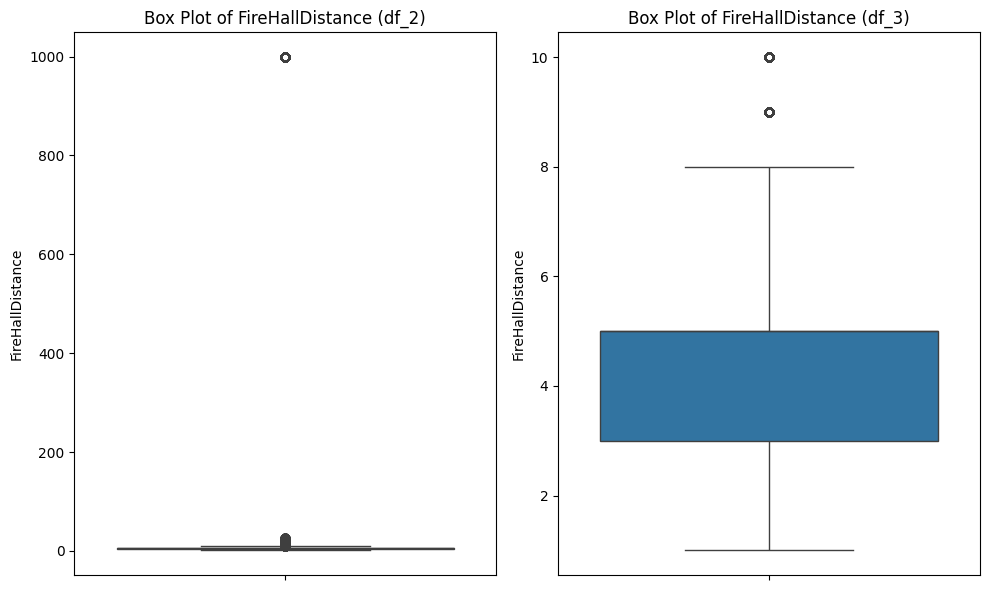

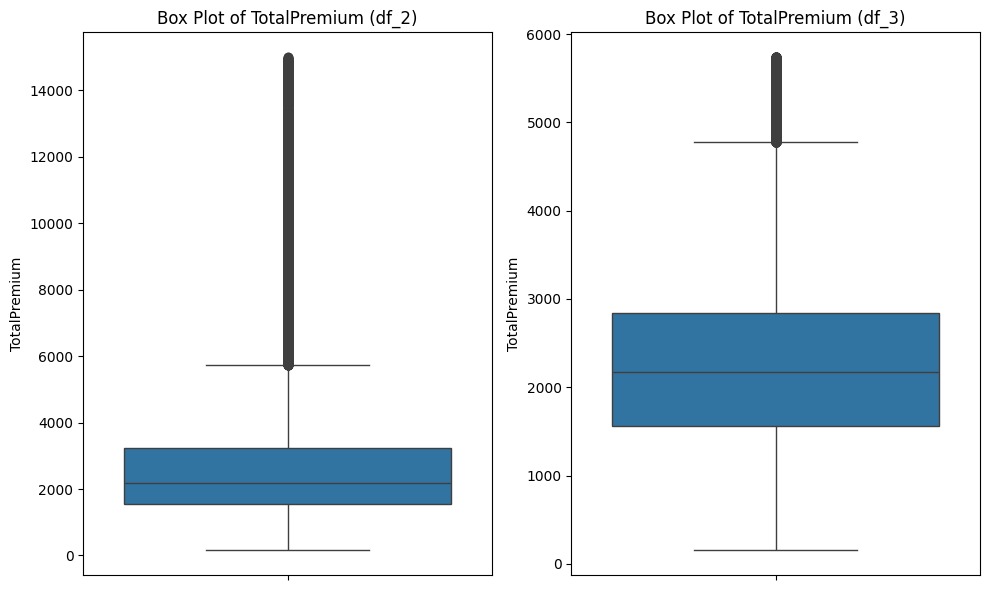

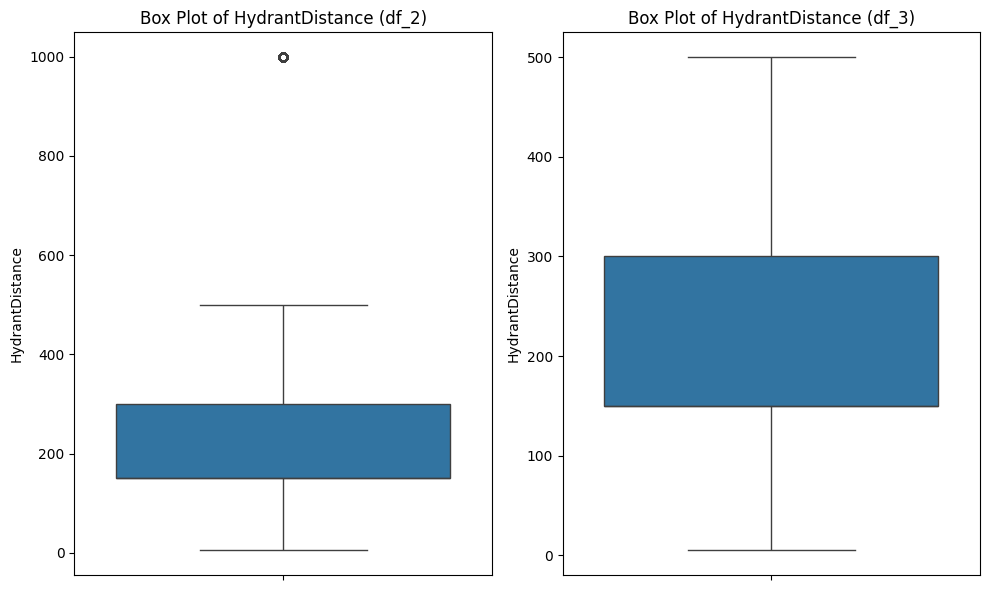

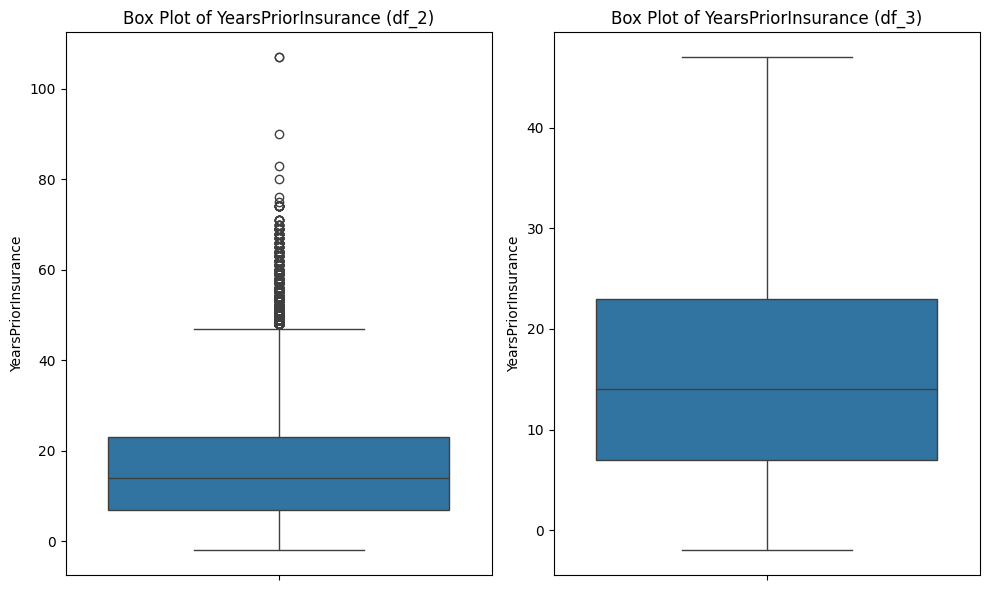

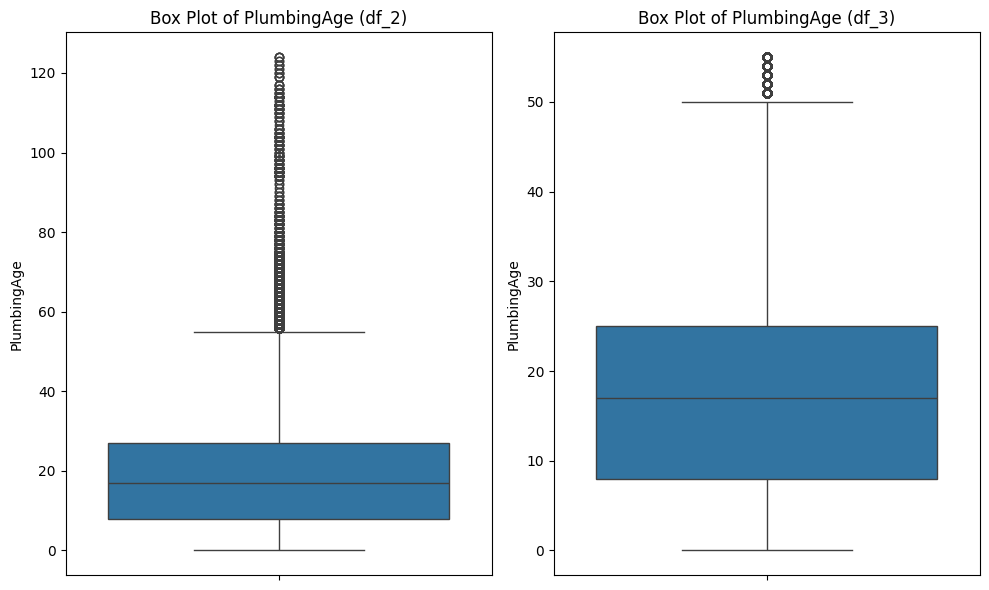

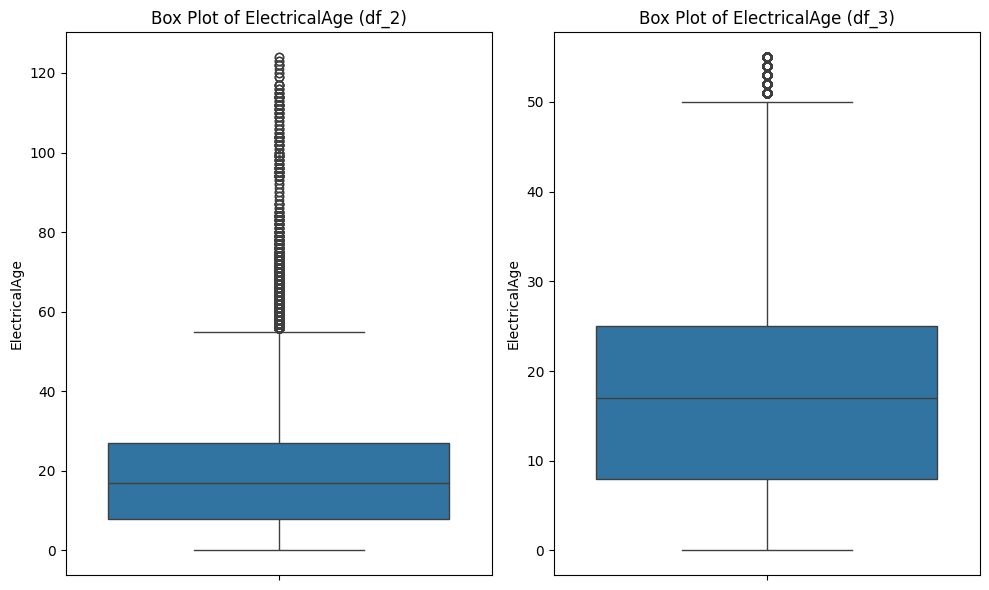

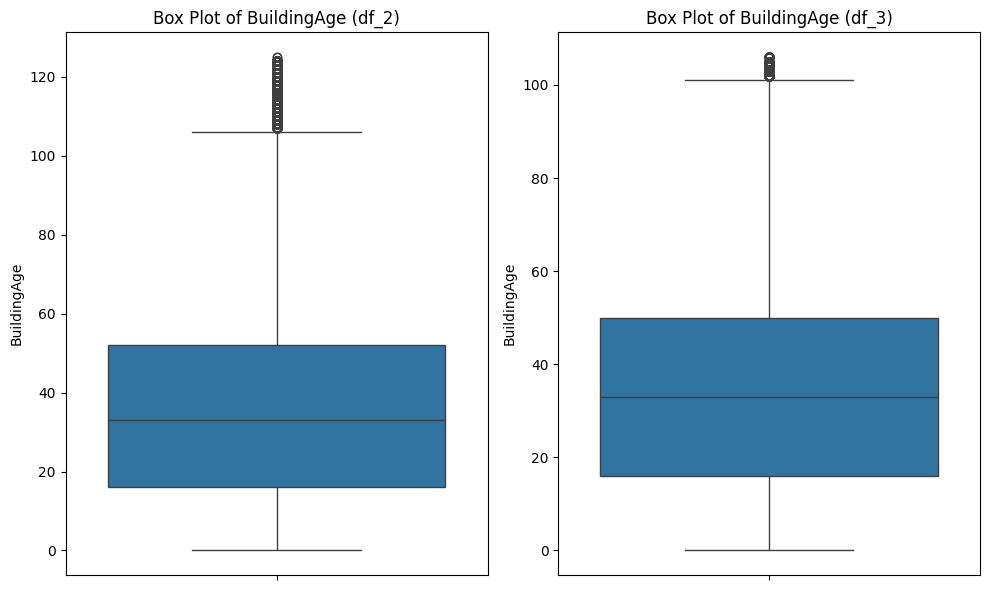

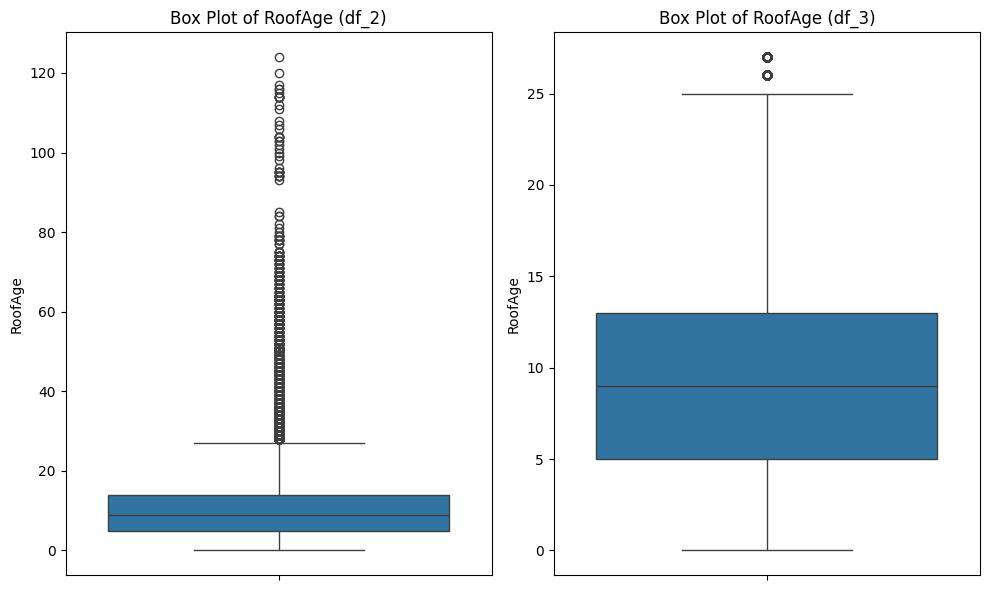

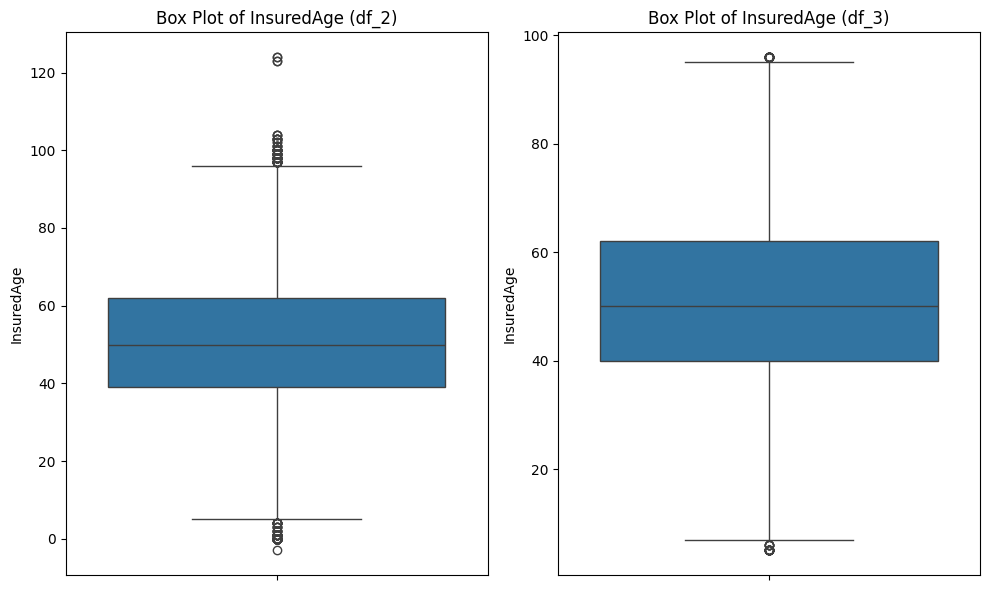

In [47]:
# prompt: plot box plot of outlier_feats_impute features side by side for df_2 and df_3 in different graph for each feature

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_2 and df_3 are defined as in your previous code

for col in outlier_feats_impute:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Box plot for df_2
    plt.subplot(1, 2, 1)  # Create a subplot for df_2
    sns.boxplot(y=df_2[col])
    plt.title(f'Box Plot of {col} (df_2)')

    # Box plot for df_3
    plt.subplot(1, 2, 2)  # Create a subplot for df_3
    sns.boxplot(y=df_3[col])
    plt.title(f'Box Plot of {col} (df_3)')

    plt.tight_layout() # Adjust subplot parameters for a tight layout
    plt.show()


In [48]:
df_outlier_removed_IQR = remove_outliers_iqr(df_3, outlier_feats_removed)
df_outlier_removed_zscore = remove_outliers_zscore(df_3, outlier_feats_removed)

In [49]:
print(df_outlier_removed_IQR.shape)
print(df_outlier_removed_zscore.shape)

(104402, 57)
(118974, 57)


In [50]:
df_3 = impute_outliers_with_median(df_2, outlier_feats_impute)

In [51]:
df_3 = df_outlier_removed_zscore.copy()

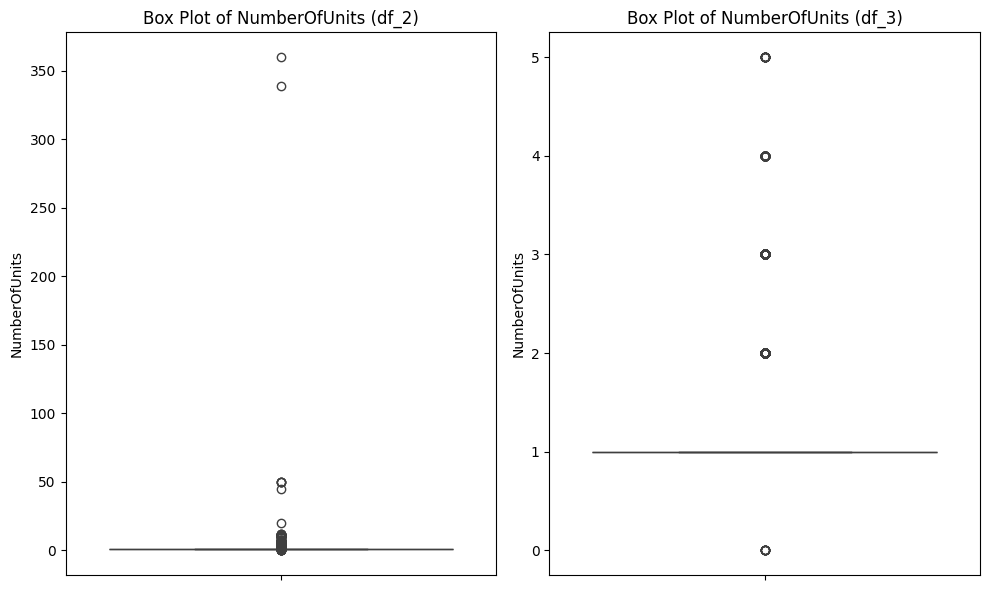

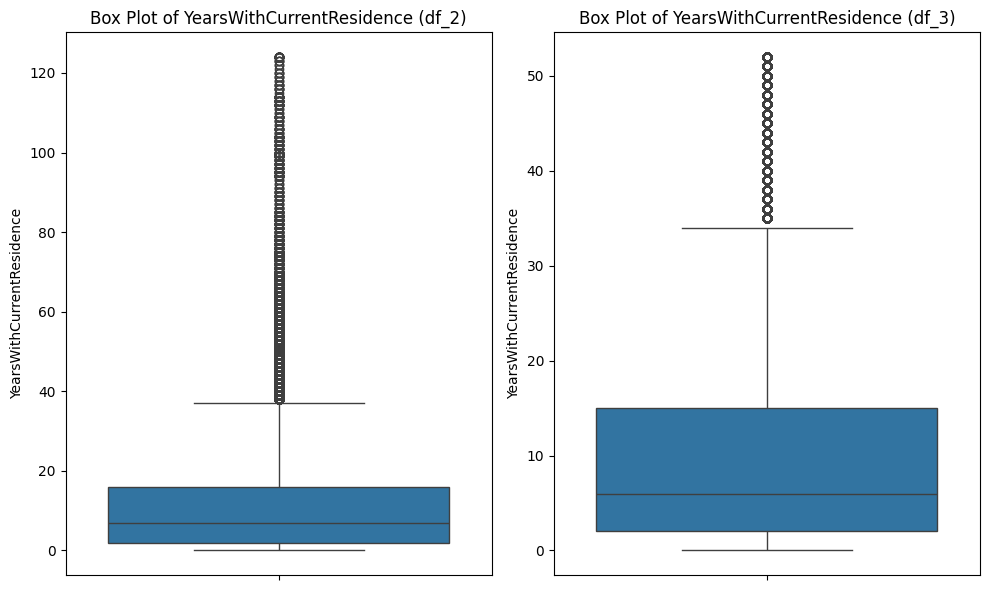

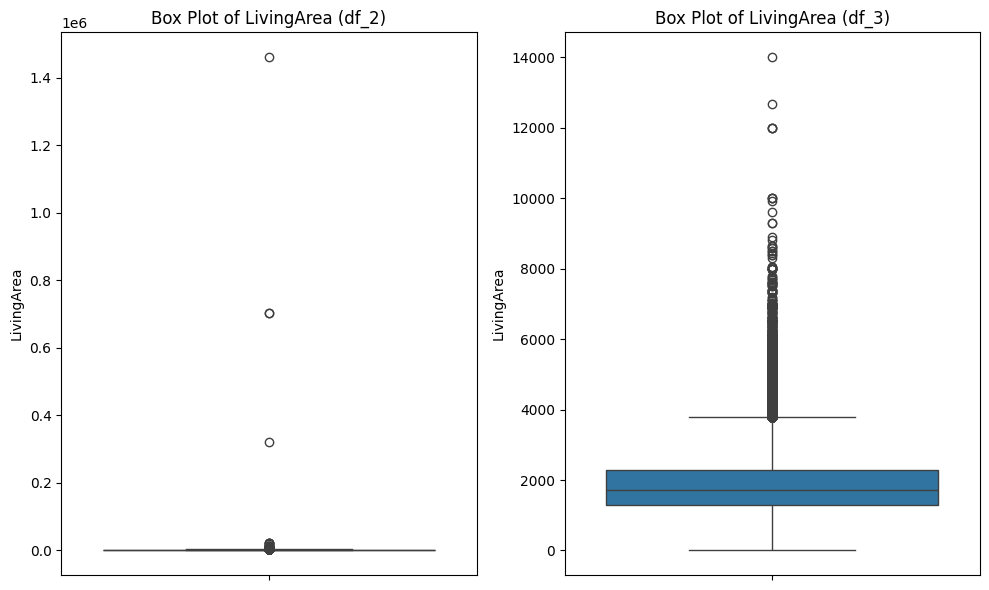

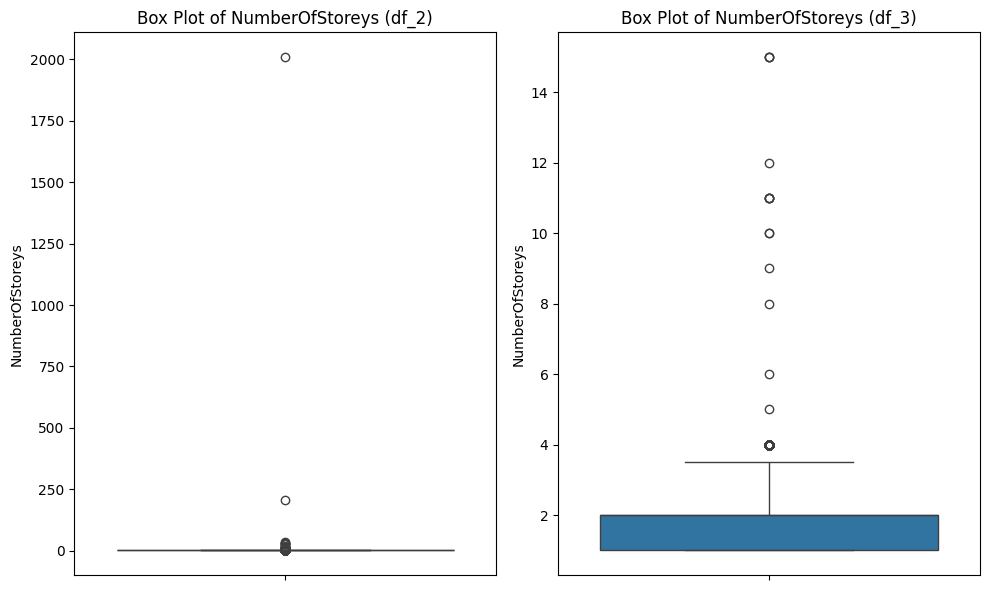

In [52]:
# prompt: plot box plot of outlier_feats_removed features side by side for df_2 and df_3

import matplotlib.pyplot as plt
# Assuming df_2 and df_3 are defined as in your previous code

for col in outlier_feats_removed:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Box plot for df_2
    plt.subplot(1, 2, 1)  # Create a subplot for df_2
    sns.boxplot(y=df_2[col])
    plt.title(f'Box Plot of {col} (df_2)')

    # Box plot for df_3
    plt.subplot(1, 2, 2)  # Create a subplot for df_3
    sns.boxplot(y=df_3[col])
    plt.title(f'Box Plot of {col} (df_3)')

    plt.tight_layout() # Adjust subplot parameters for a tight layout
    plt.show()


In [53]:
numerical_features

['HABID',
 'BuildingAge',
 'AgeOfRoof',
 'InsuredAge',
 'NumberOfMortgages',
 'YearsWithCurrentResidence',
 'YearsPriorInsurance',
 'BuildingValue',
 'FireHallDistance',
 'Retired',
 'NumberOfNSF',
 'NumberOfFamilies',
 'NumberOfUnits',
 'NumberOfStoreys',
 'NumberOfBedrooms',
 'PoolAge',
 'LivingArea',
 'NonSmoker',
 'YearsSinceLastNSF',
 'NumberOfFloaters',
 'TotalPremium',
 'RoofAge',
 'ElectricalAge',
 'PlumbingAge',
 'PrimaryHeatApproved',
 'SecondaryHeatApproved',
 'IsOwnerOccupied',
 'HasInLawApartment',
 'HasBasementApartment',
 'IsLogConstruction',
 'CoInsuredAge',
 'HasSumpPumpPit',
 'IsSumpPumpAlarmed',
 'NUMFULLBATHS',
 'NUMHALFBATHS',
 'FINISHEDBASEMENTPERC',
 'HasSepticSystem',
 'NumberOfCarsGarage',
 'HydrantDistance']

In [54]:
# prompt: list where numerical_features has nunique values less than 10 along with their nqunique values and also create list of such features

# Assuming df_1 is your DataFrame (as defined in the previous code)
numerical_features = df_1.select_dtypes(include=['number']).columns.tolist()

low_nunique_features = []
low_nunique_values = {}

for col in numerical_features:
    if df_1[col].nunique() > 15:
        low_nunique_features.append(col)
        low_nunique_values[col] = df_1[col].nunique()

print("Numerical features with nunique greater  than 15:")
for feature, nunique_val in low_nunique_values.items():
    print(f"{feature}: {nunique_val}")

print("\nList of such features:", low_nunique_features)


Numerical features with nunique greater  than 15:
HABID: 121432
BuildingAge: 127
InsuredAge: 105
YearsWithCurrentResidence: 125
YearsPriorInsurance: 80
BuildingValue: 37834
FireHallDistance: 28
NumberOfUnits: 18
NumberOfStoreys: 29
LivingArea: 4517
TotalPremium: 9537
RoofAge: 107
ElectricalAge: 125
PlumbingAge: 125
FINISHEDBASEMENTPERC: 80

List of such features: ['HABID', 'BuildingAge', 'InsuredAge', 'YearsWithCurrentResidence', 'YearsPriorInsurance', 'BuildingValue', 'FireHallDistance', 'NumberOfUnits', 'NumberOfStoreys', 'LivingArea', 'TotalPremium', 'RoofAge', 'ElectricalAge', 'PlumbingAge', 'FINISHEDBASEMENTPERC']


In [55]:
# prompt: remove ['NumberOfUnits','NumberOfStoreys'] from low_nunique_features and add ['HydrantDistance']
Num_Feats_to_transform = low_nunique_features.copy()
Num_Feats_to_transform.remove('NumberOfUnits')
Num_Feats_to_transform.remove('NumberOfStoreys')
Num_Feats_to_transform.append('HydrantDistance')
Num_Feats_to_transform

['HABID',
 'BuildingAge',
 'InsuredAge',
 'YearsWithCurrentResidence',
 'YearsPriorInsurance',
 'BuildingValue',
 'FireHallDistance',
 'LivingArea',
 'TotalPremium',
 'RoofAge',
 'ElectricalAge',
 'PlumbingAge',
 'FINISHEDBASEMENTPERC',
 'HydrantDistance']

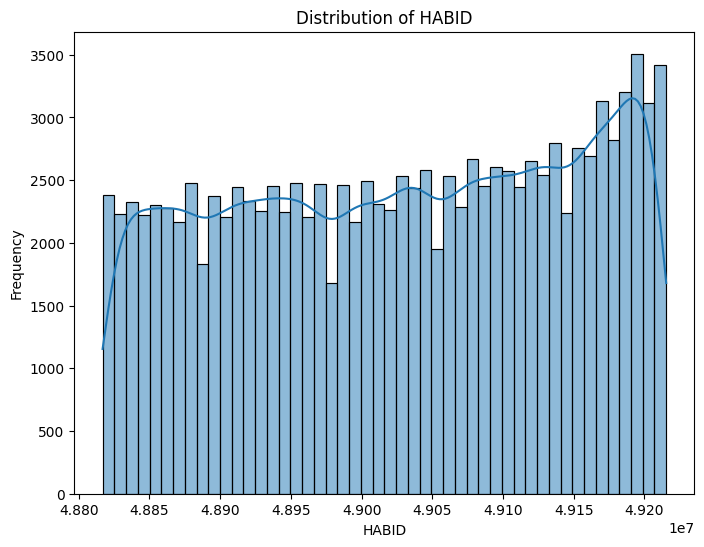

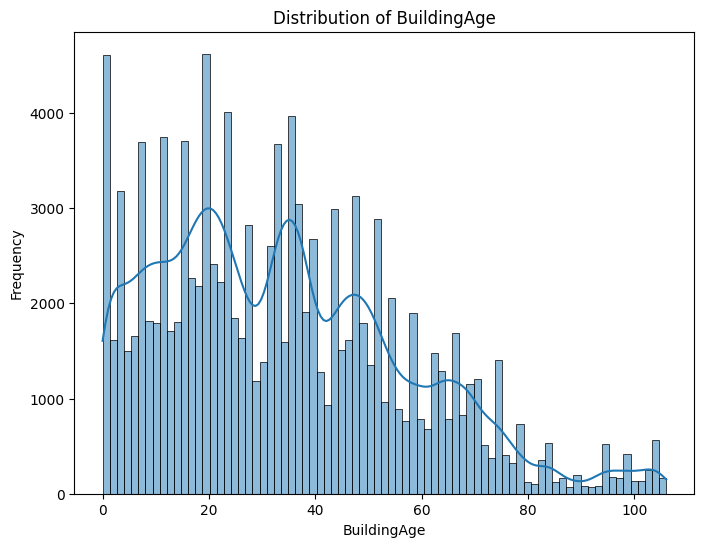

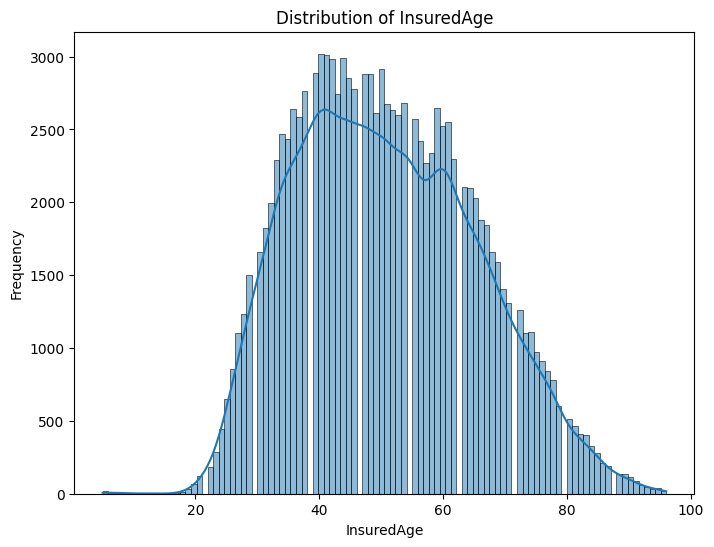

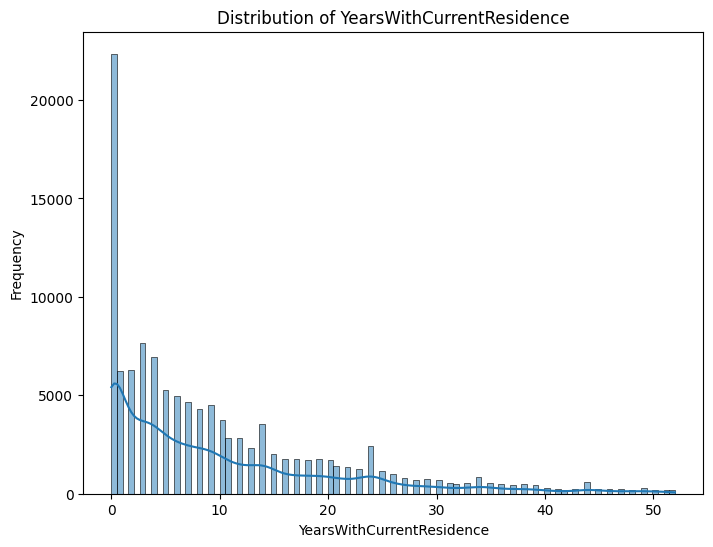

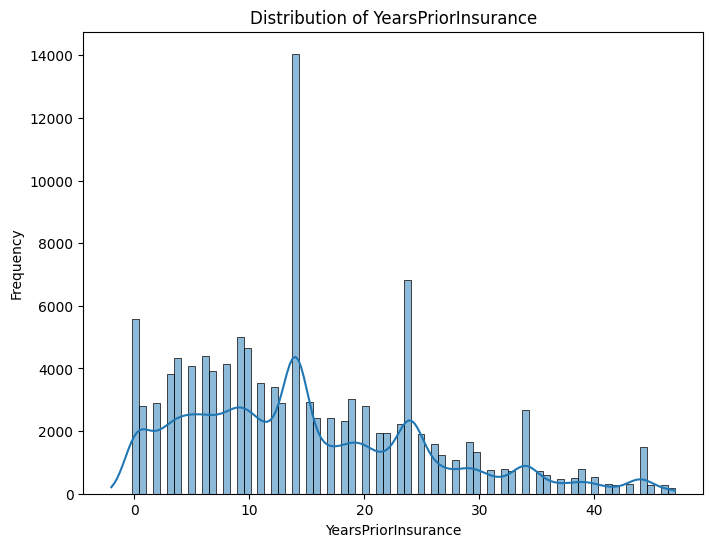

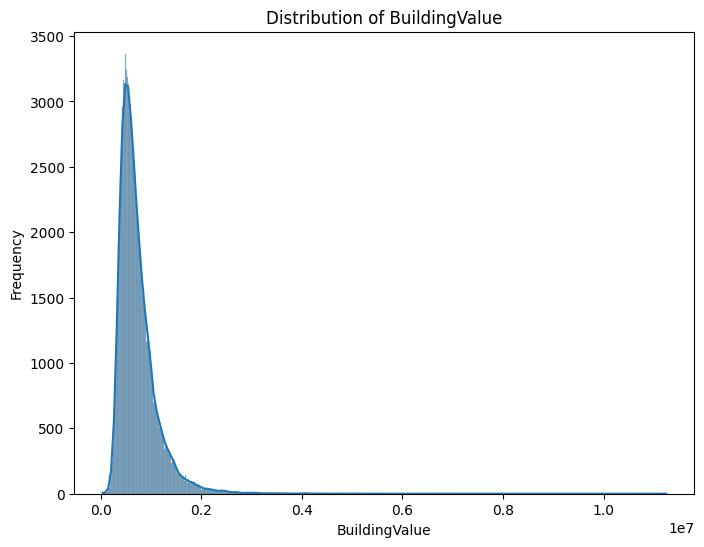

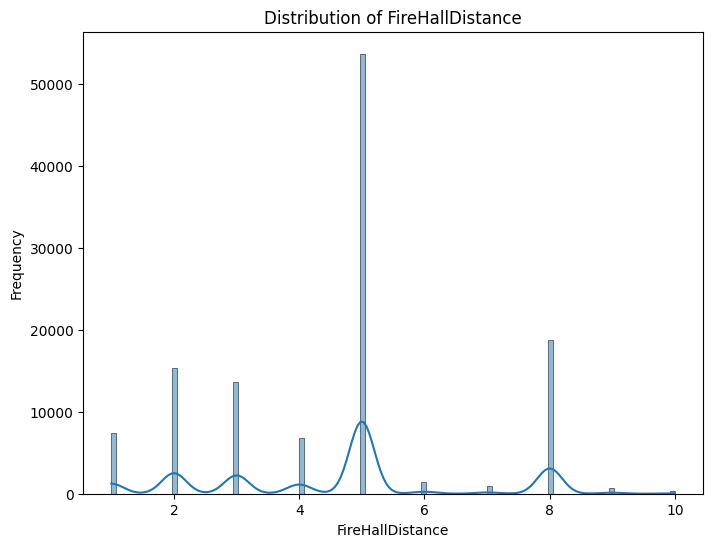

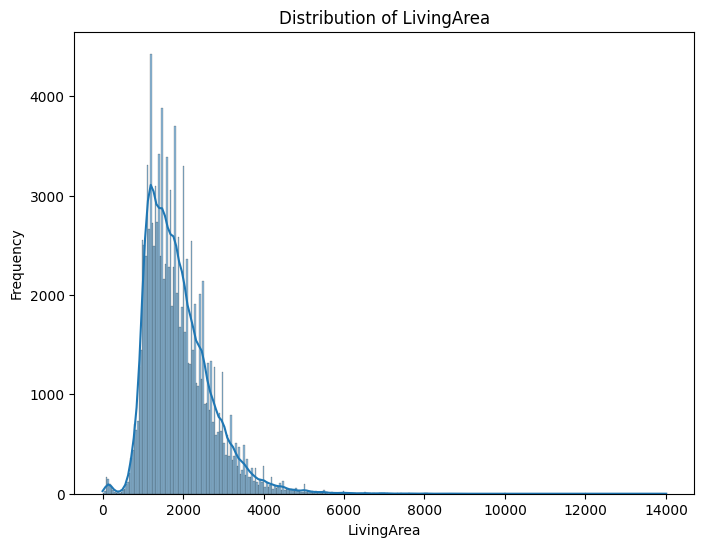

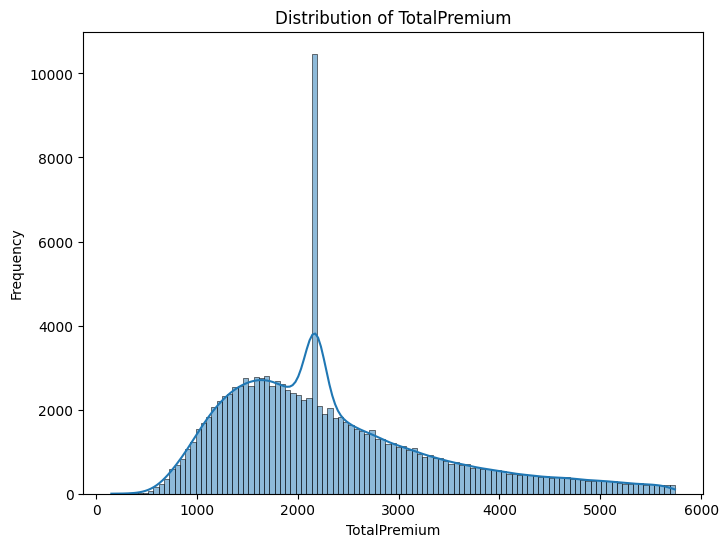

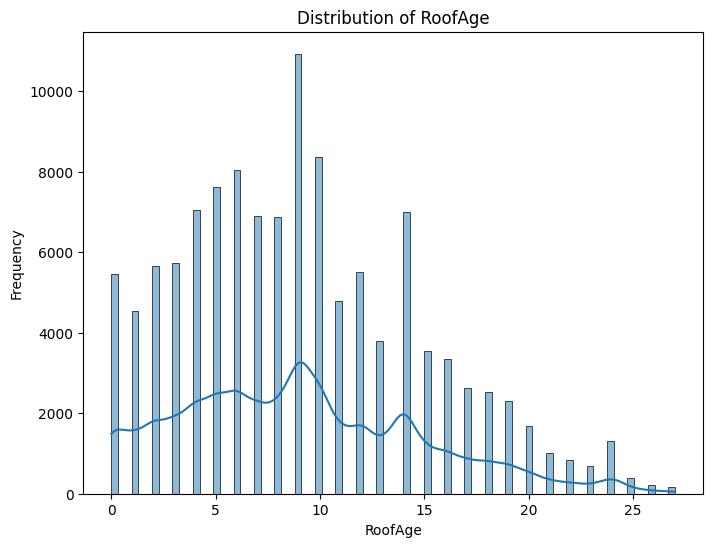

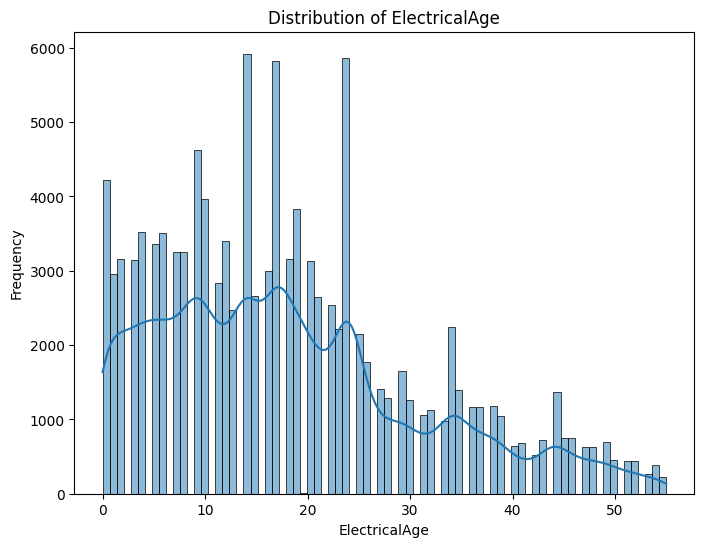

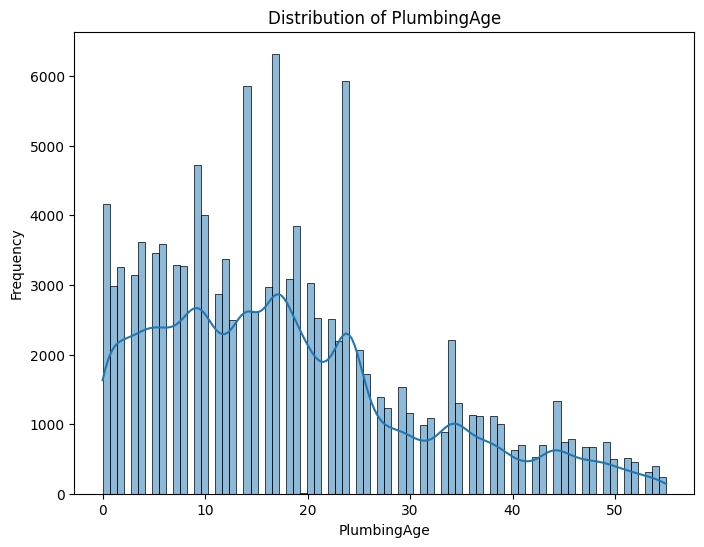

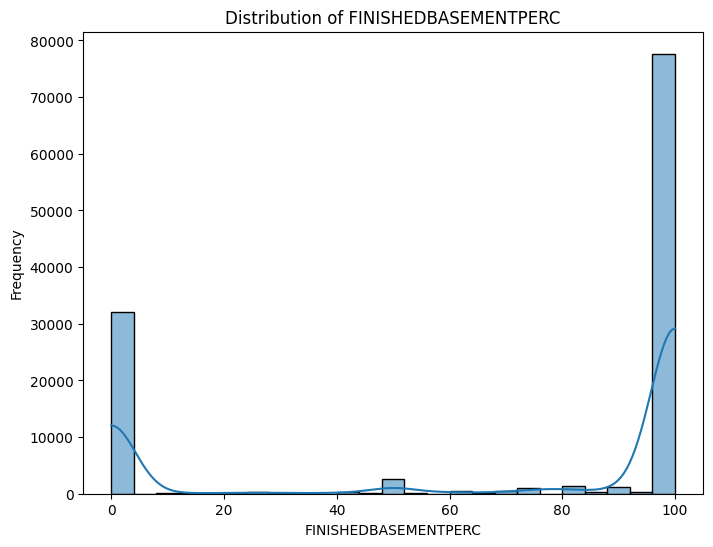

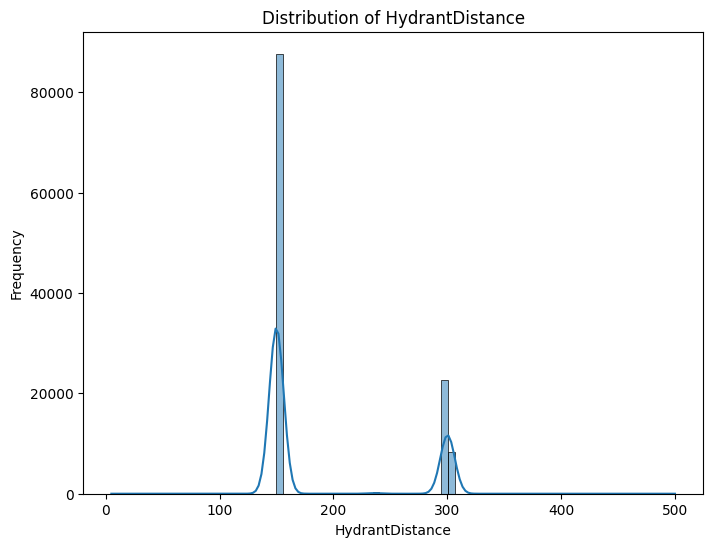

In [56]:
# prompt: plot which of the numerical features are normally distributed

import matplotlib.pyplot as plt
import seaborn as sns


for col in Num_Feats_to_transform:
  plt.figure(figsize=(8, 6))
  sns.histplot(df_3[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


In [57]:
# prompt: check if values in columns Num_Feats_to_transform have any negative values and show what pertenage and count (only if greater than 0)

# Check for negative values in 'Num_Feats_to_transform' columns
for col in numerical_features:
    negative_count = (df_3[col] < 0).sum()
    if negative_count > 0:
        negative_percentage = (negative_count / len(df_3)) * 100
        print(f"Column '{col}':")
        print(f"- Number of negative values: {negative_count}")
        print(f"- Percentage of negative values: {negative_percentage:.2f}%")


Column 'YearsPriorInsurance':
- Number of negative values: 1
- Percentage of negative values: 0.00%


In [58]:
# prompt: drop that negative vvalue and print which column and how many converted

# Check for negative values in 'Num_Feats_to_transform' columns and convert them to their absolute values
converted_columns = []
for col in numerical_features:
    negative_count = (df_3[col] < 0).sum()
    if negative_count > 0:
        print(f"Column '{col}':")
        print(f"- Number of negative values: {negative_count}")
        df_3[col] = df_3[col].abs()  # Convert negative values to positive
        converted_columns.append(col)
        print(f"- Negative values converted to absolute values")

print("\nColumns with negative values converted:", converted_columns)


Column 'YearsPriorInsurance':
- Number of negative values: 1
- Negative values converted to absolute values

Columns with negative values converted: ['YearsPriorInsurance']


In [59]:
# prompt: check skew coefficent of Log, Squareroot features in Num_Feats_to_transform and print side by side

import numpy as np
import pandas as pd

# Assuming df_3 and Num_Feats_to_transform are defined from previous code

def skew_coefficient(data):
    return data.skew()

# Calculate skewness for log and square root transformations
skewness_df = pd.DataFrame(index=Num_Feats_to_transform, columns=['Original', 'Log', 'Square Root'])

for col in Num_Feats_to_transform:
    skewness_df.loc[col, 'Original'] = skew_coefficient(df_3[col])
    skewness_df.loc[col, 'Log'] = skew_coefficient(np.log1p(df_3[col]))  # Log transformation
    skewness_df.loc[col, 'Square Root'] = skew_coefficient(np.sqrt(df_3[col]))  # Square root transformation


skewness_df


Original       Log Square Root
HABID                     -0.104575 -0.107308   -0.105941
BuildingAge                0.664485  -1.34333   -0.286895
InsuredAge                 0.300182  -0.35552   -0.003724
YearsWithCurrentResidence  1.448397  -0.26394    0.252345
YearsPriorInsurance        0.749598 -1.090728   -0.320527
BuildingValue              2.941202  0.354739    1.305228
FireHallDistance            0.16928 -0.695914   -0.387012
LivingArea                 1.505768  -1.04374    0.547135
TotalPremium               1.015954 -0.033154    0.517449
RoofAge                    0.542143 -1.056853   -0.542258
ElectricalAge              0.727389 -1.076303   -0.253331
PlumbingAge                0.760094 -1.051617   -0.222649
FINISHEDBASEMENTPERC      -0.896163 -1.012848   -0.970864
HydrantDistance            1.081792  1.018041    1.074251

In [61]:
df_4 = df_3.copy()

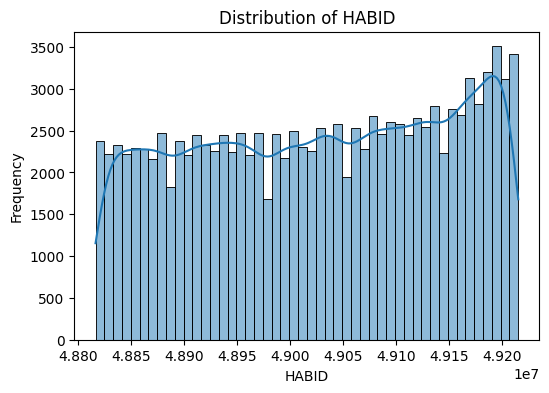

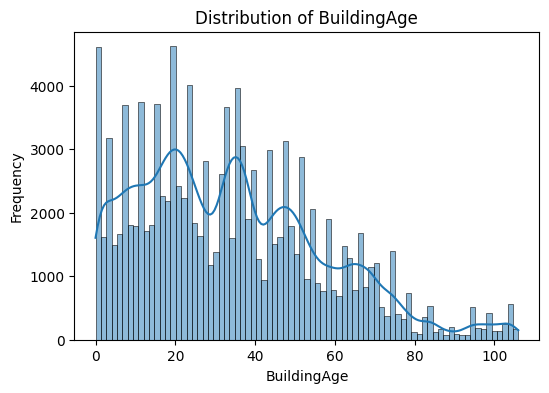

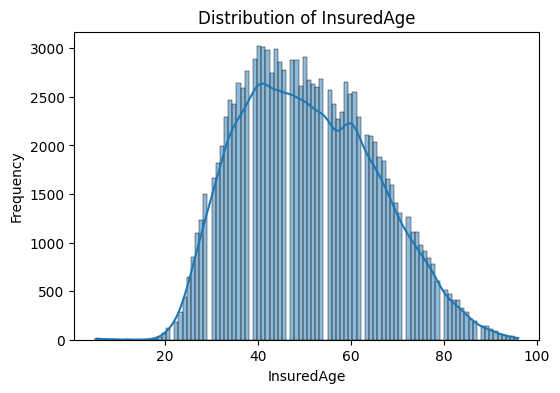

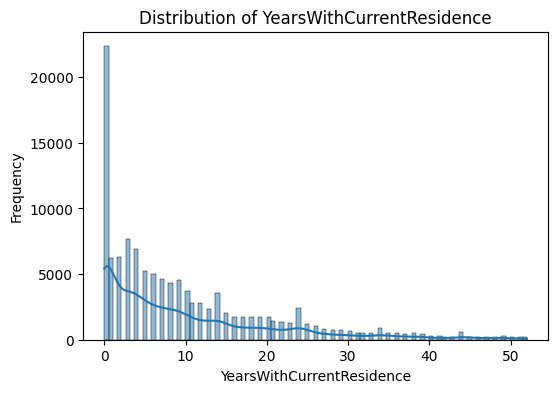

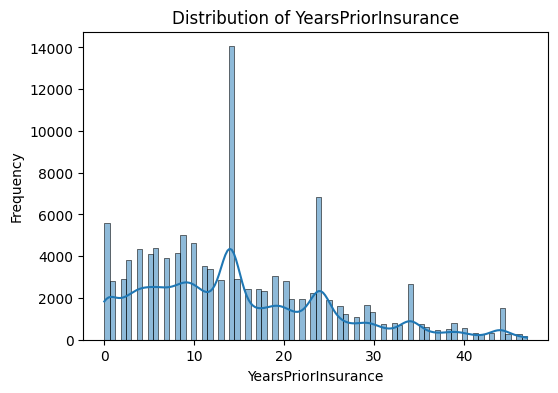

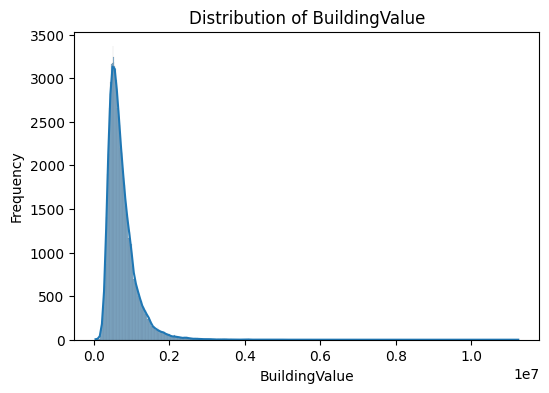

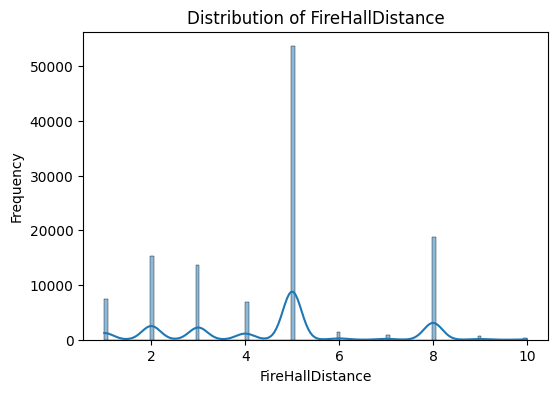

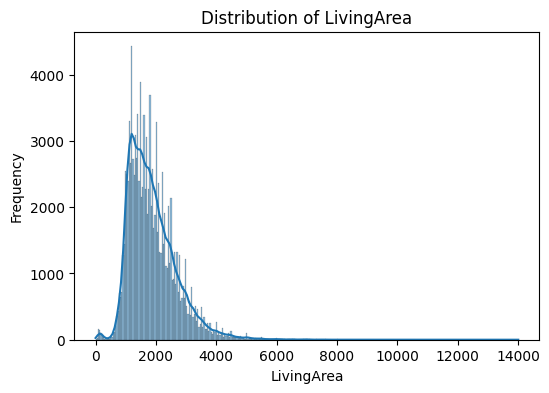

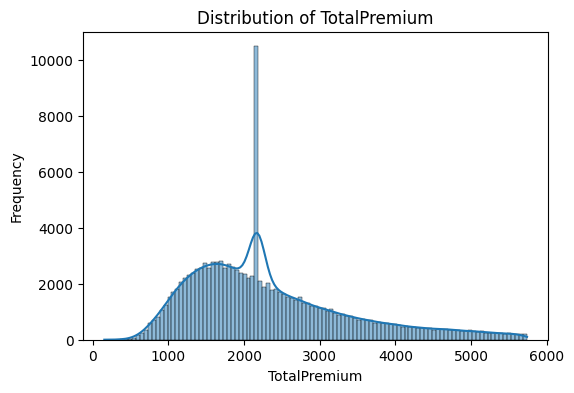

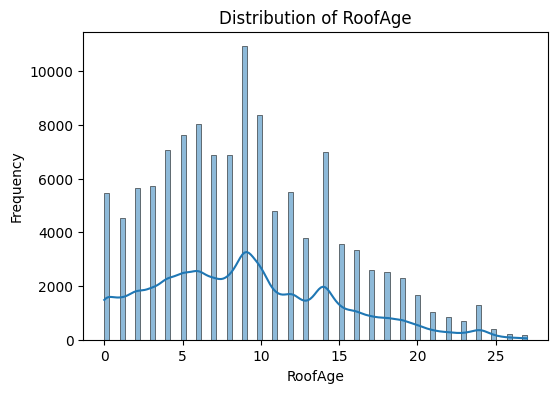

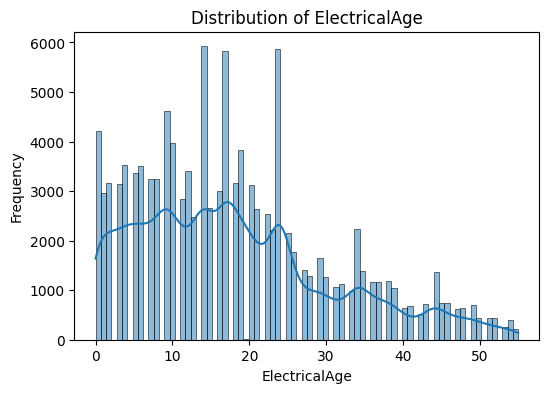

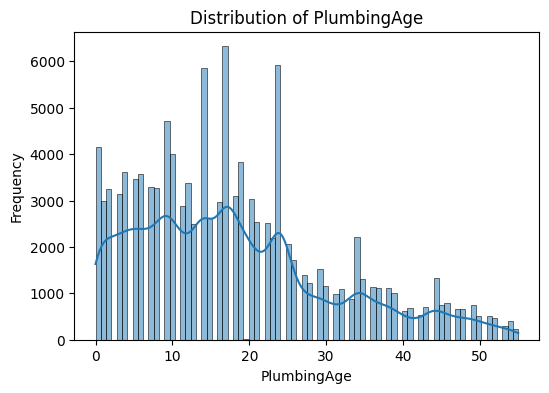

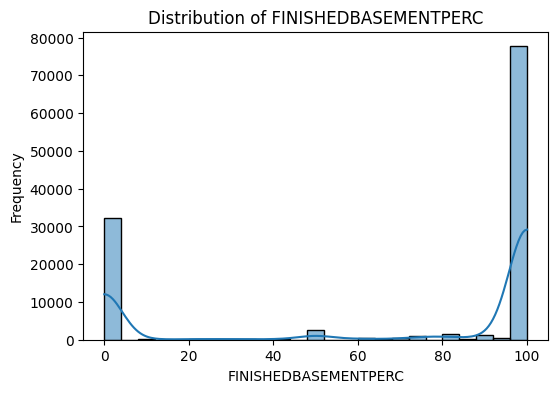

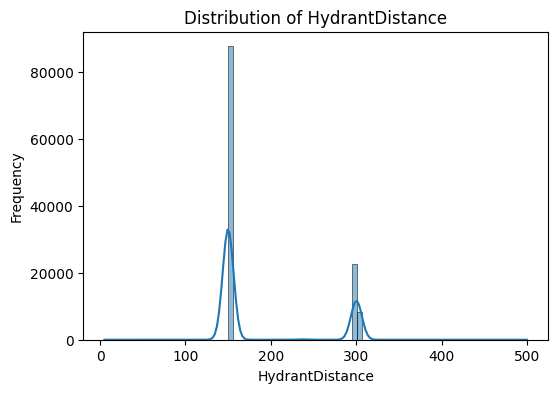

In [62]:
# prompt: plot which of the numerical features are normally distributed

import matplotlib.pyplot as plt
import seaborn as sns


for col in Num_Feats_to_transform:
  plt.figure(figsize=(6, 4))
  sns.histplot(df_4[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()


In [63]:
# prompt: write a code for encoding variable City with Target Encoding where our Target is 'BuildingValue' (use df_5), also use KFold to avoid dataleakage

import pandas as pd
from sklearn.model_selection import KFold

def target_encode(df, col, target, kfold=5):
    kf = KFold(n_splits=kfold, shuffle=True, random_state=42)
    encoded_col = pd.Series(index=df.index)
    for train_index, test_index in kf.split(df):
        train_df = df.iloc[train_index]
        test_df = df.iloc[test_index]

        mean_target = train_df.groupby(col)[target].mean()
        encoded_col.iloc[test_index] = test_df[col].map(mean_target)

    return encoded_col.fillna(df[target].mean())


# Example usage
df_4['City_Encoded'] = target_encode(df_4, 'City', 'BuildingValue')
#df_4.drop(columns=['City'], inplace=True)

In [64]:
# Assuming 'QuoteDate' represents the date when the property was quoted or built
df_4['PrimaryHeatDate'] = pd.to_datetime(df_2['PrimaryHeatDate'])

# Calculate age (difference between the current year and the QuoteDate year)
df_4['PrimaryHeatAge'] = pd.to_datetime('today').year - df_2['PrimaryHeatDate'].dt.year

# Optionally drop the original 'QuoteDate' column if it’s no longer needed
df_4.drop(columns=['PrimaryHeatDate'], inplace=True)


In [65]:
# Apply Log Transformation where selected
log_transform_features = ["YearsWithCurrentResidence", "BuildingValue", "TotalPremium", "HydrantDistance"]
sqrt_transform_features = ["BuildingAge", "InsuredAge", "YearsPriorInsurance",
                           "FireHallDistance", "LivingArea", "RoofAge",
                           "ElectricalAge", "PlumbingAge", "FINISHEDBASEMENTPERC"]
for feature in log_transform_features:
    df_4[feature] = np.log1p(df_4[feature])  # log1p avoids log(0) errors

# Apply Square Root Transformation where selected

for feature in sqrt_transform_features:
    df_4[feature] = np.sqrt(df_4[feature])

print("Selected transformations applied successfully!")


Selected transformations applied successfully!


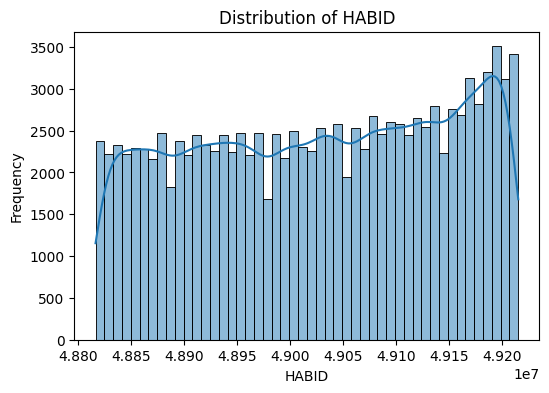

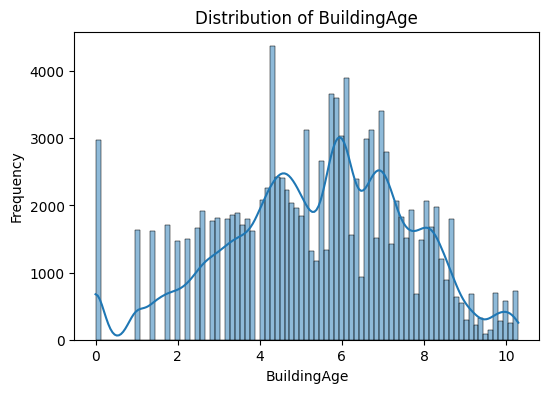

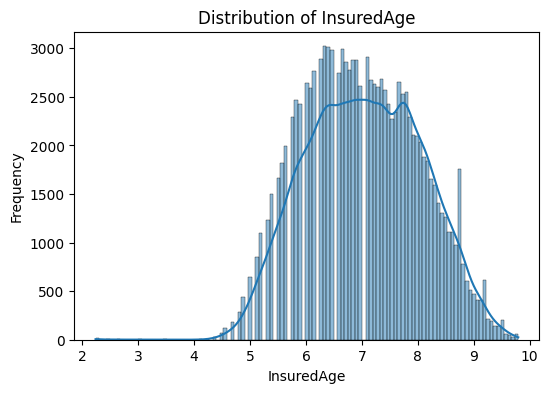

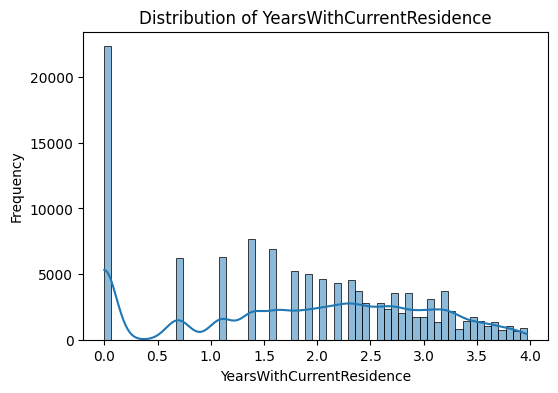

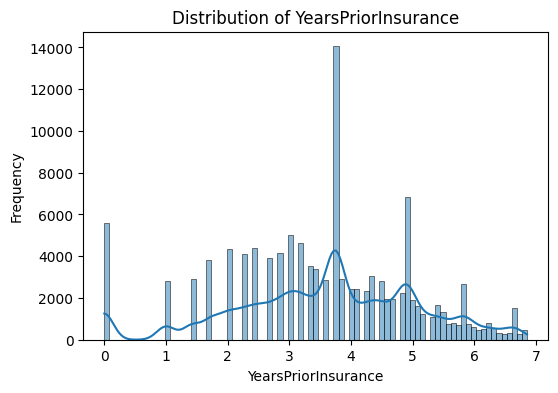

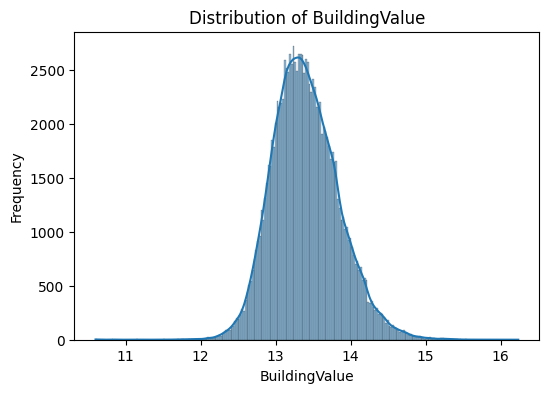

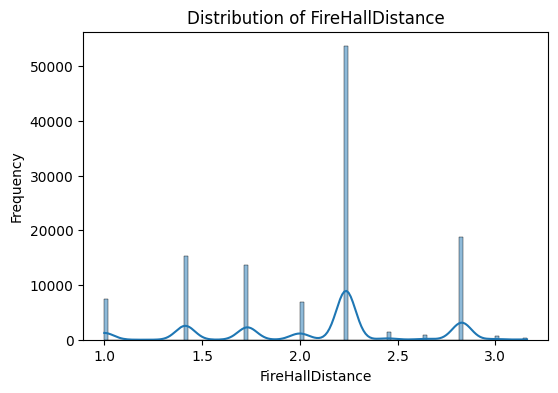

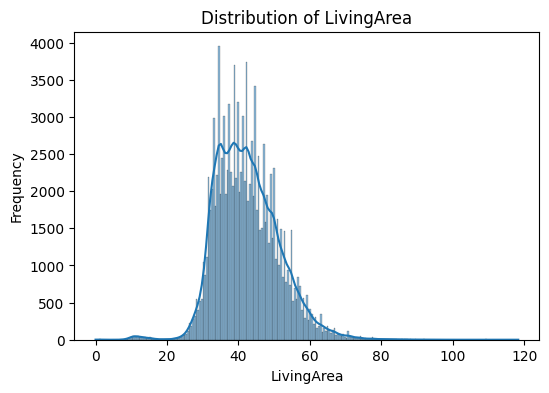

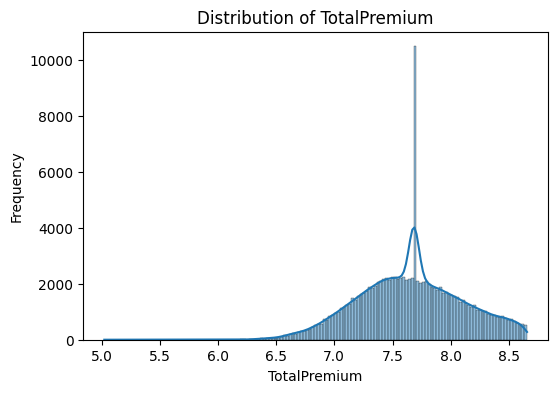

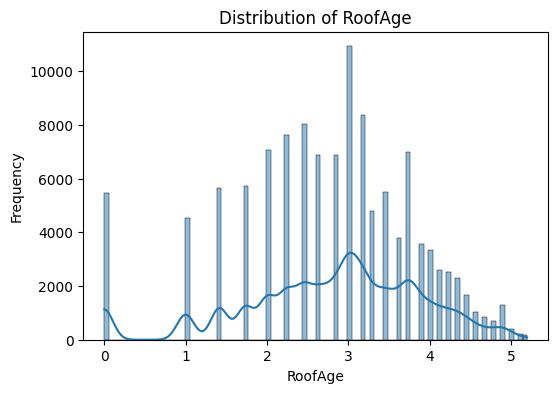

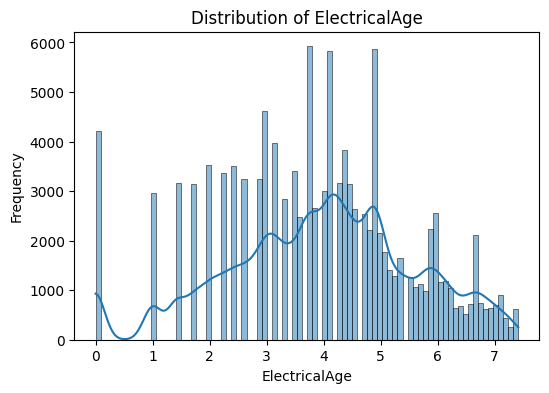

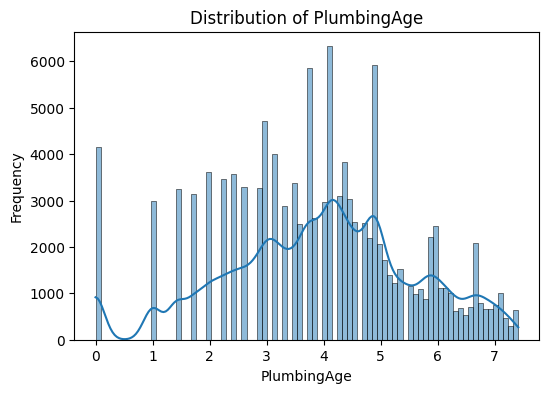

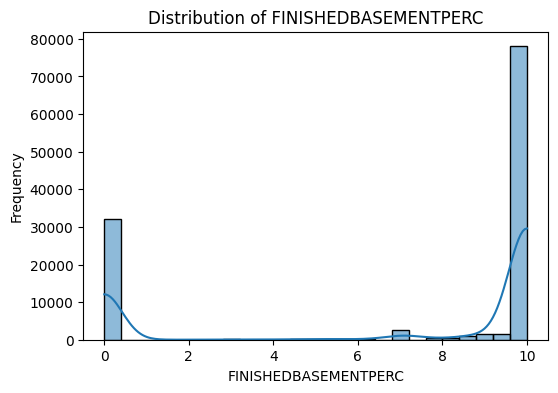

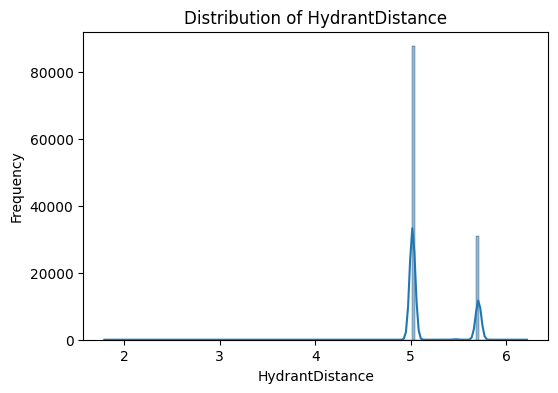

In [66]:
# prompt: create distribution of Num_Feats_to_transform features again grid plot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_3 and Num_Feats_to_transform are defined from previous code

for col in Num_Feats_to_transform:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_4[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


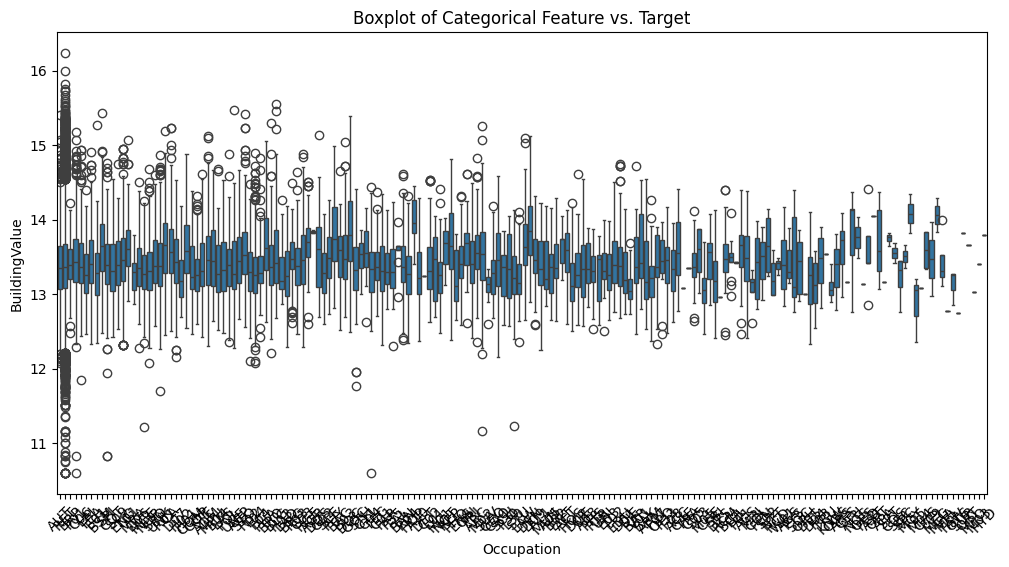

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='BuildingValue', data=df_4)
plt.xticks(rotation=45)
plt.title("Boxplot of Categorical Feature vs. Target")
plt.show()

In [70]:
# prompt: drop City df_4

df_4 = df_4.drop(columns=['City'])


In [71]:
df_4 = df_4.drop(columns=['DwellingType'])

In [72]:
df_4 = df_4.drop(columns=['Occupation'])

In [73]:
# prompt: create list of categorical features of df_4 excluding ones which have nunique values greater than 100

# Assuming df_4 is defined from the previous code

categorical_features = df_4.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features_filtered = [col for col in categorical_features if df_4[col].nunique() <= 100]

categorical_features_filtered


['Province',
 'Protection',
 'BuildingStyle',
 'ElectricalType',
 'ElectricalWiringType',
 'PrimaryHeat',
 'FireAlarmType',
 'ConstructionType',
 'BurglarAlarmType',
 'LivingAreaMeasure',
 'SumpPumpType',
 'SumpPumpAuxPower',
 'BackFlowValve',
 'EXTERIORFINISH',
 'ROOFTYPE',
 'GarageType',
 'PlumbingType']

<Figure size 1200x600 with 0 Axes>

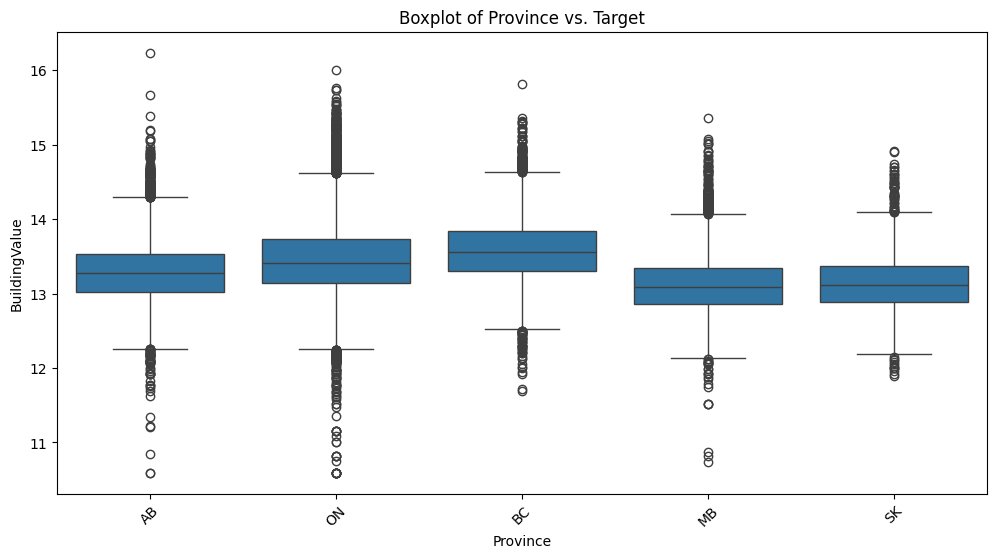

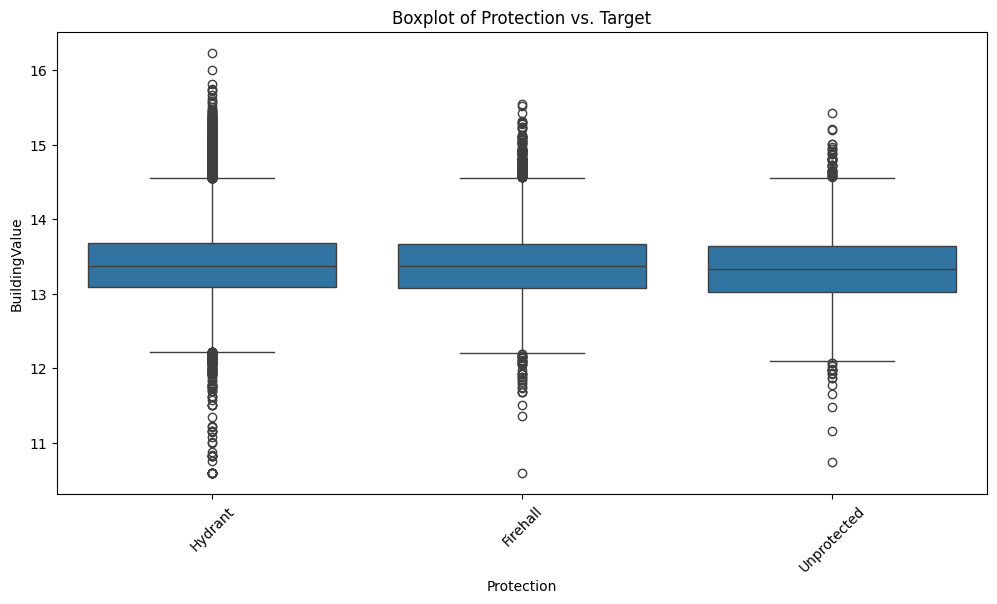

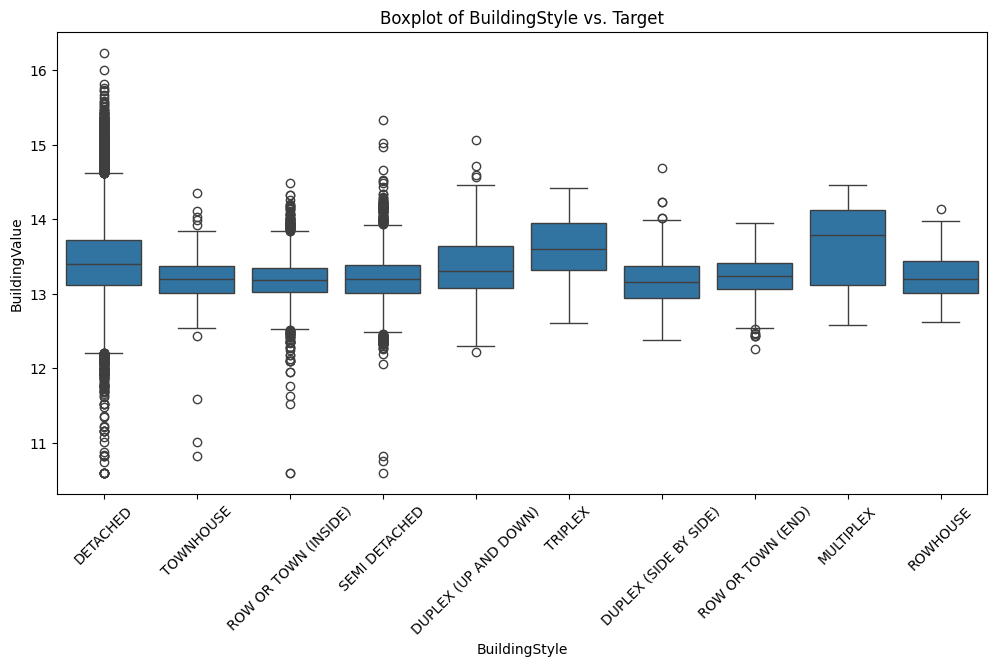

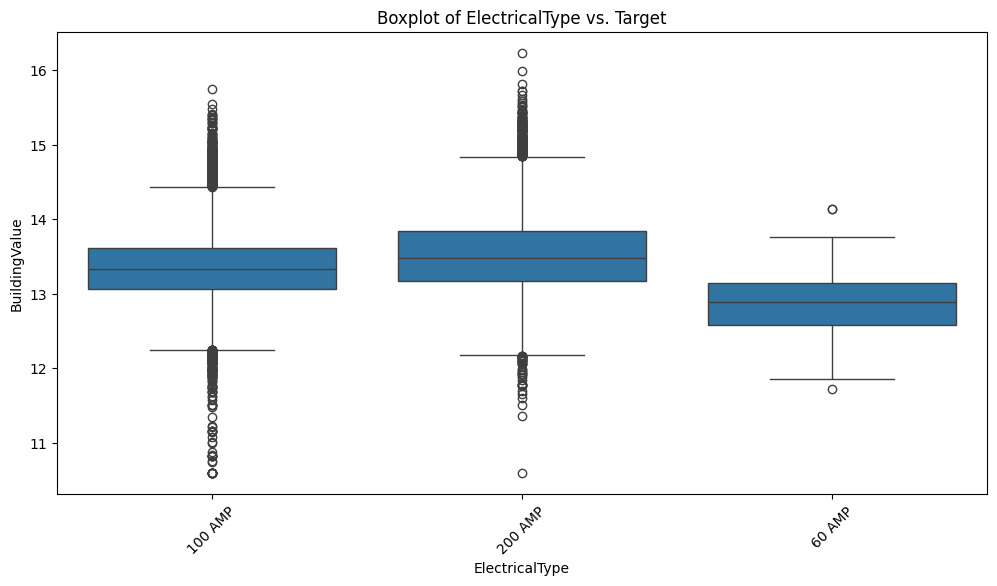

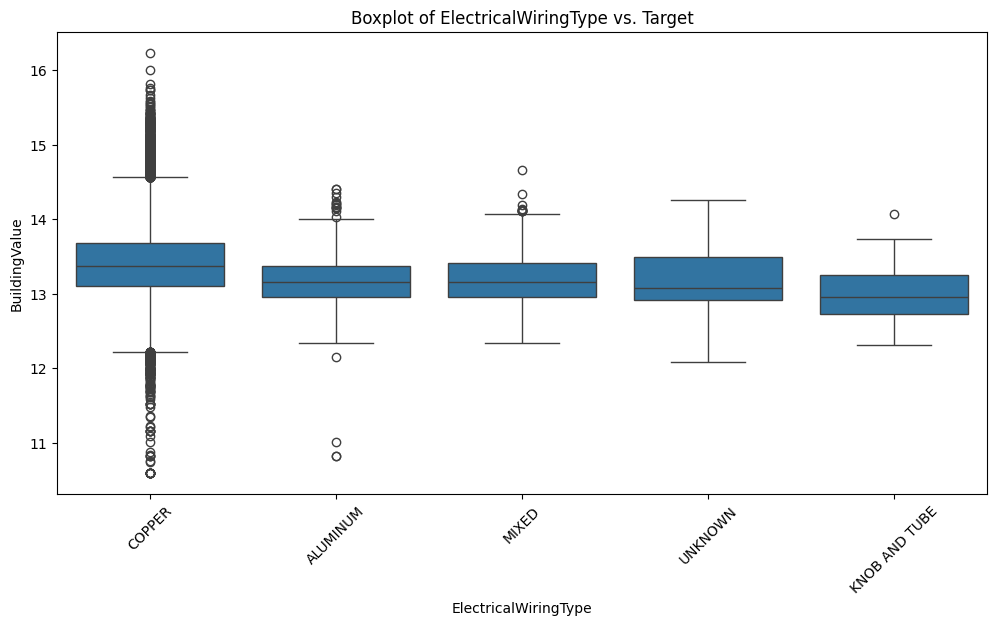

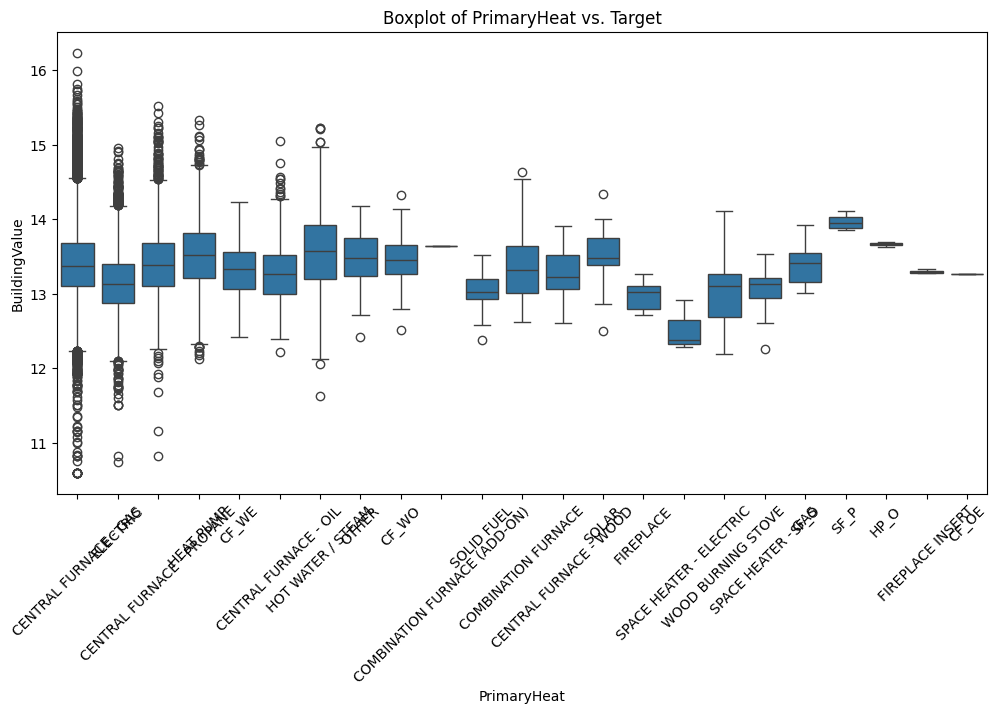

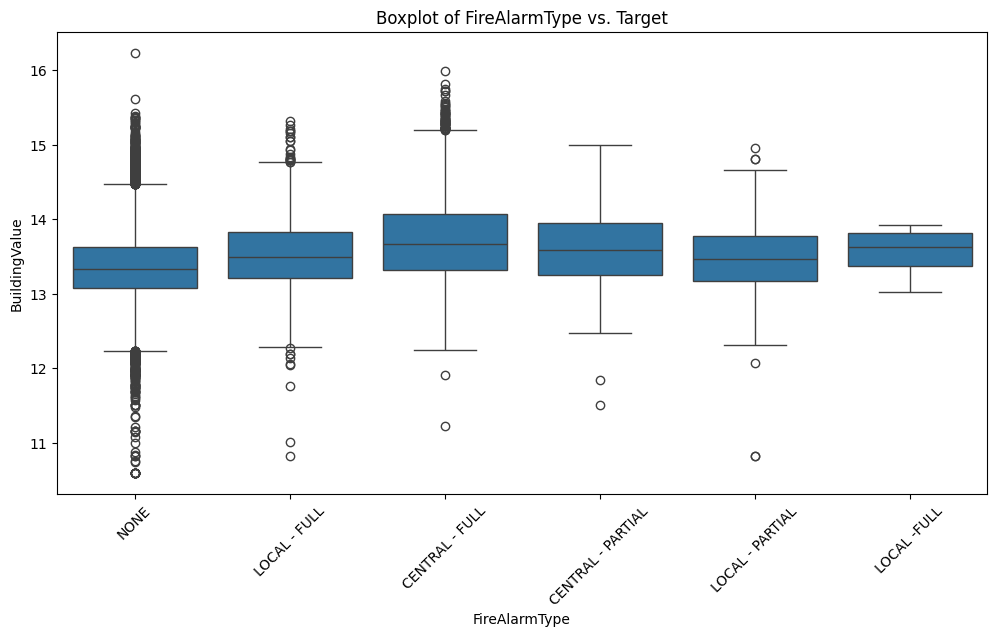

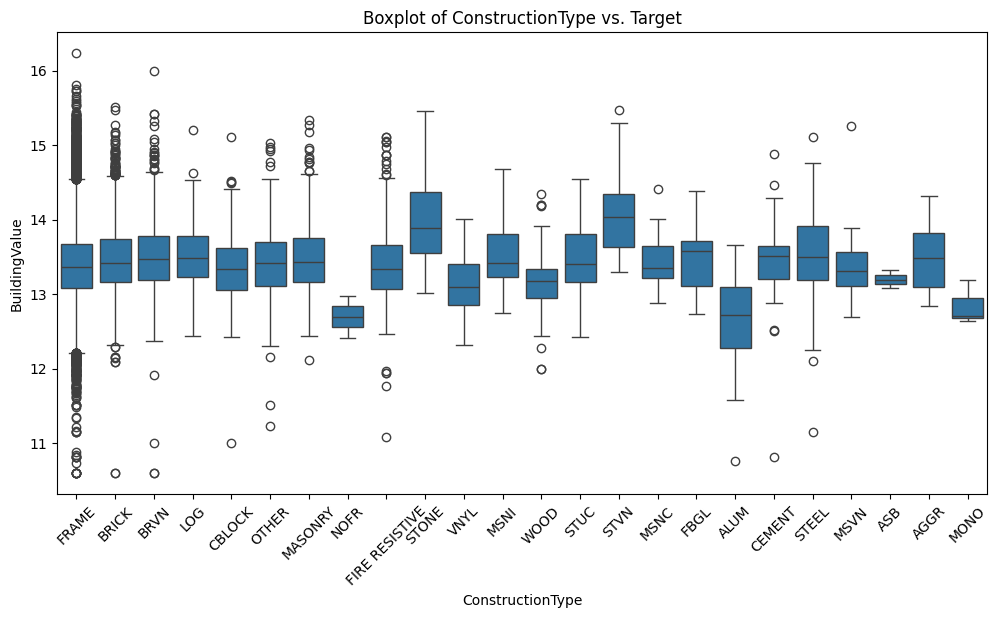

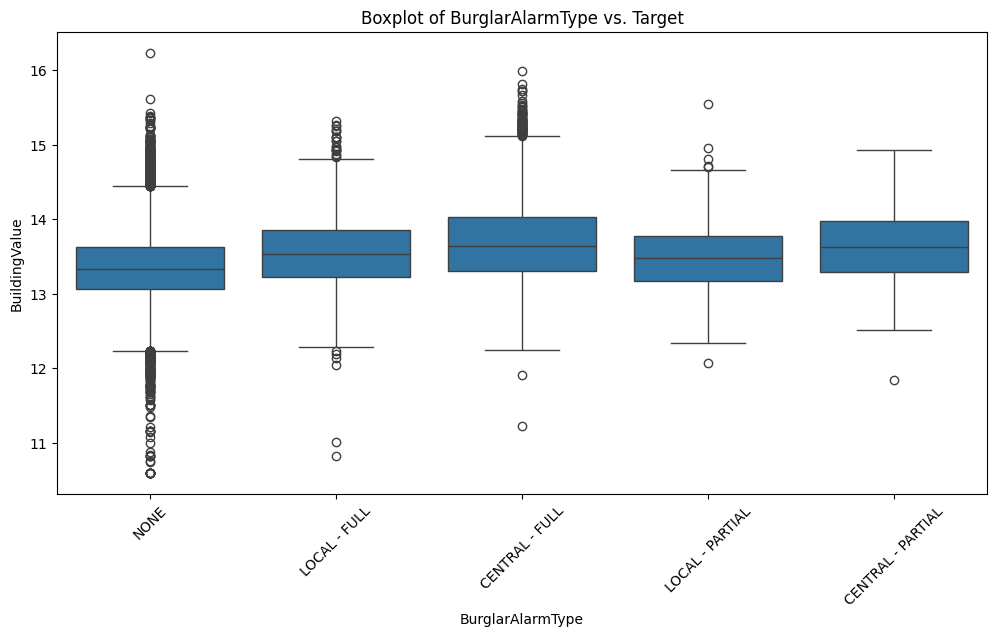

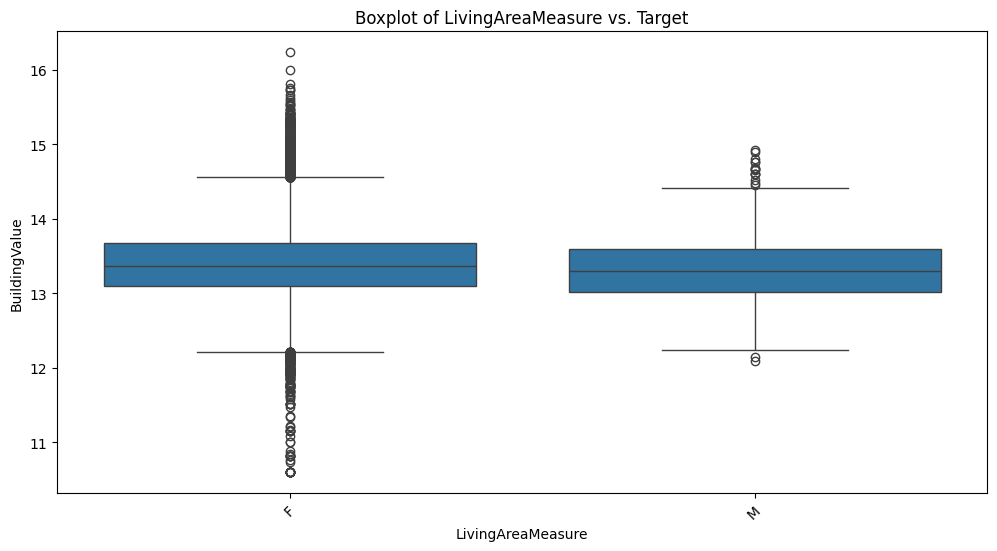

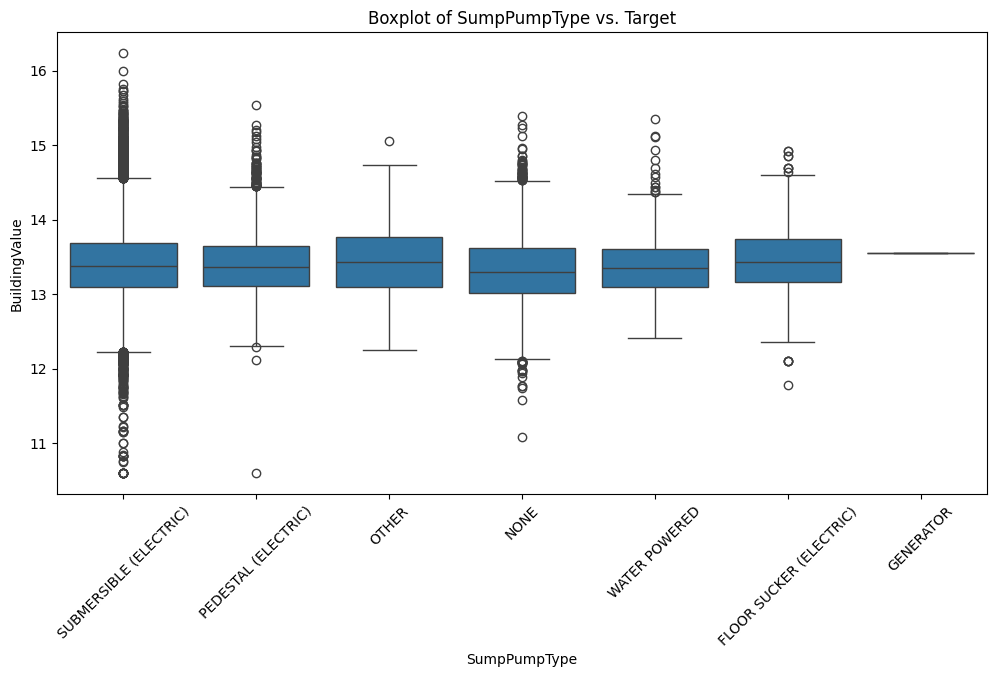

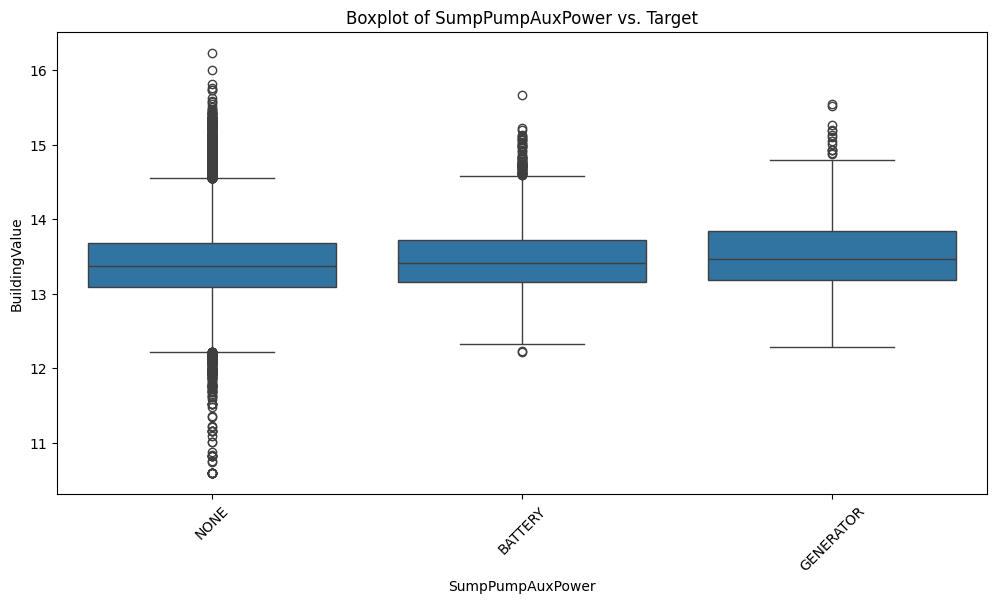

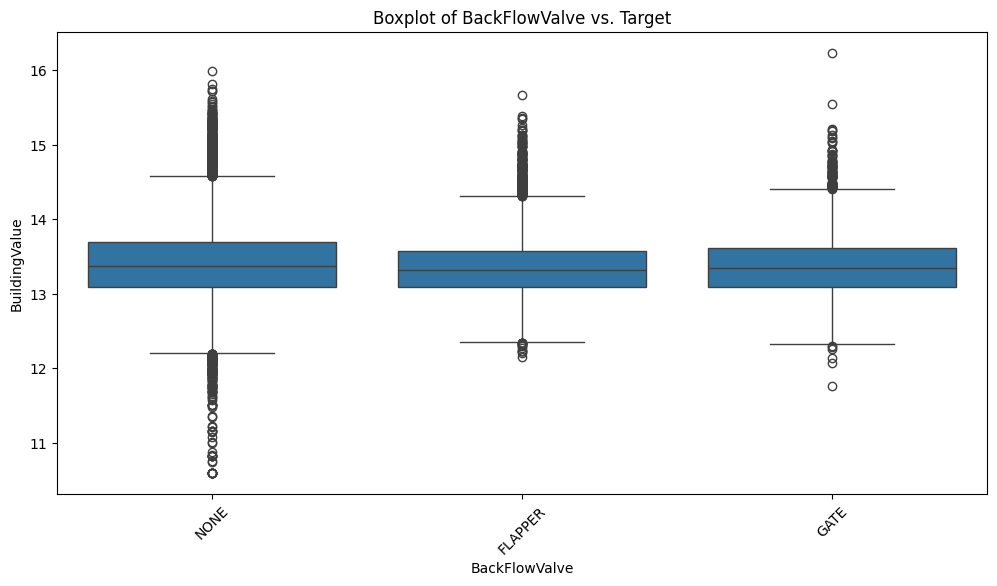

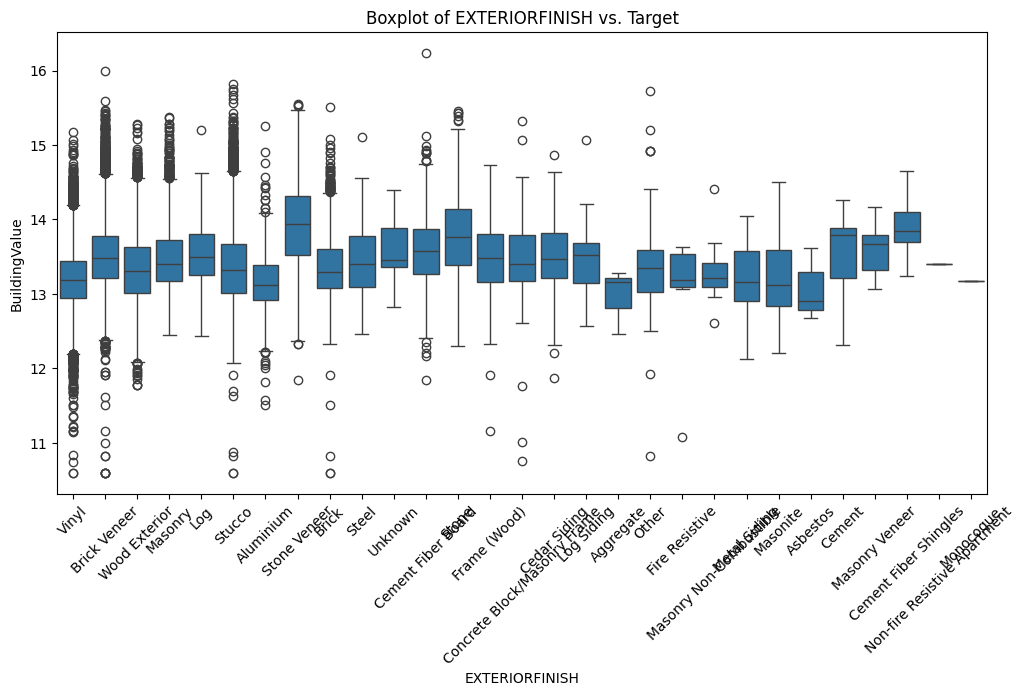

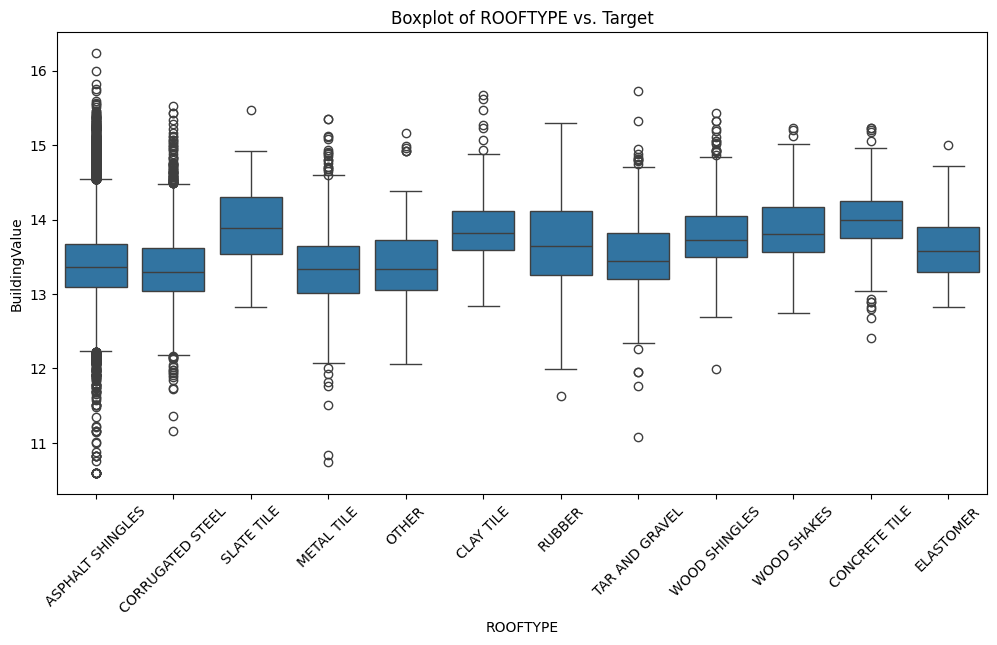

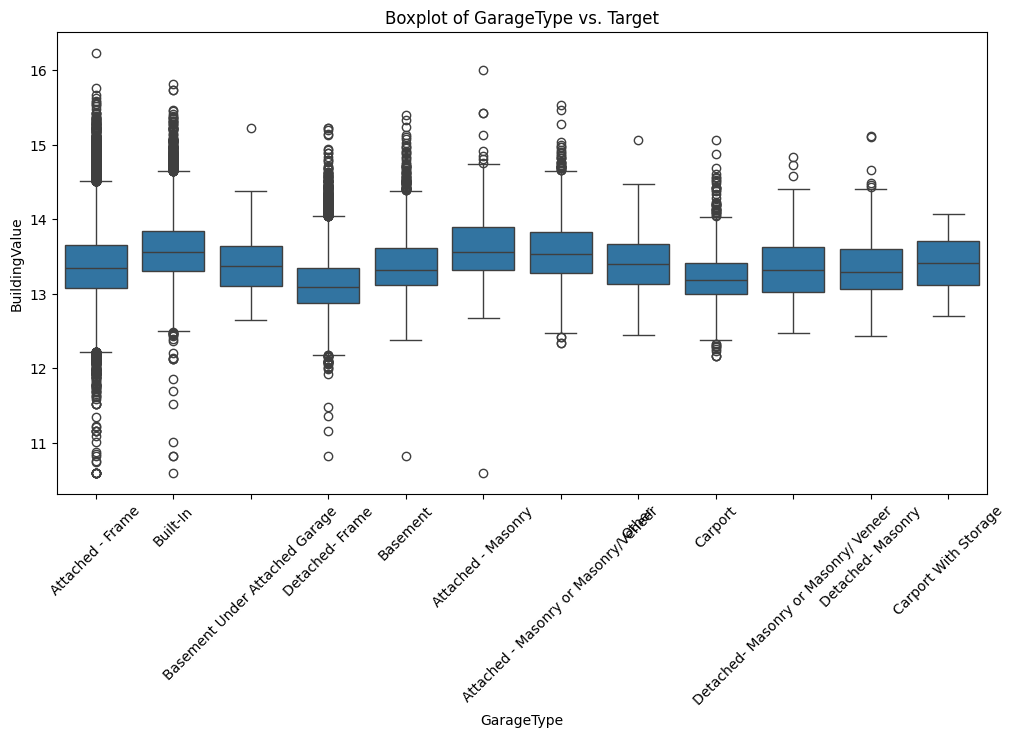

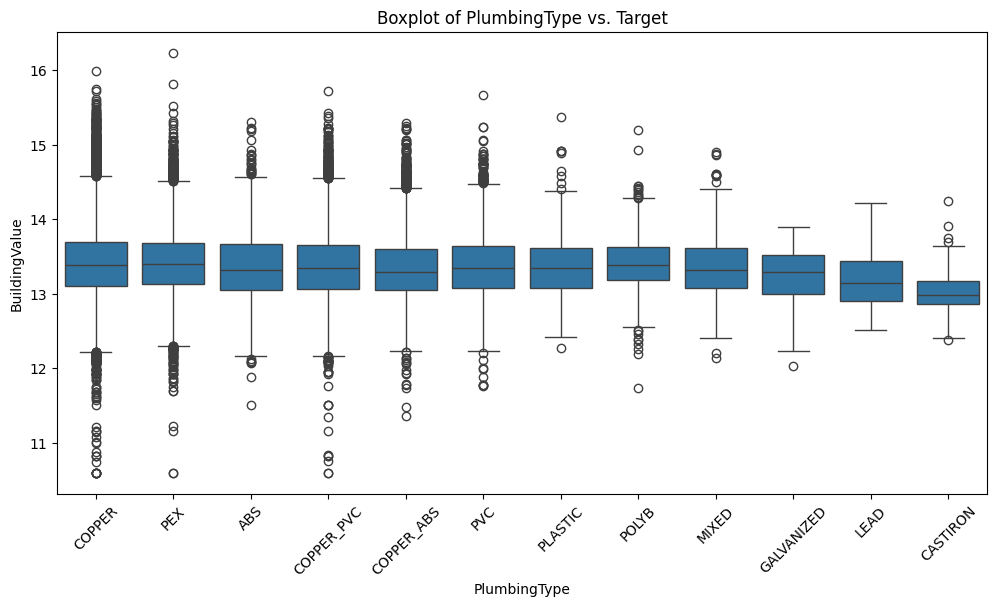

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical features (excluding the target variable)

# Set figure size
plt.figure(figsize=(12, 6))

# Loop through categorical features and create boxplots
for col in categorical_features_filtered:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df_4[col], y=df_4['BuildingValue'])
    plt.xticks(rotation=45)
    plt.title(f"Boxplot of {col} vs. Target")
    plt.show()


In [75]:
unrelated_categorical_features = ['ProtectionType', 'SumpPumpType',
                                   'SumpPumpAuxPower', 'BackFlowValveTarget',
                                   'PlumbingType','Occupation', 'QuoteDate','PostalCode']

In [76]:
# prompt: Remove unrelated_categorical_features from categorical_features_filtered and create new list called Related_Categorical_Features

Related_Categorical_Features = [
    feature for feature in categorical_features
    if feature not in unrelated_categorical_features
]


In [79]:
df_5 = df_4.copy()

In [97]:
temp = df_4.columns

In [80]:
# prompt: Write one hot encoding on features in  Related_Categorical_Features in df_5

import pandas as pd

# Assuming df_5 and Related_Categorical_Features are defined as in your provided code

# Create dummy variables for categorical features
df_5 = pd.get_dummies(df_5, columns=Related_Categorical_Features, drop_first=True)

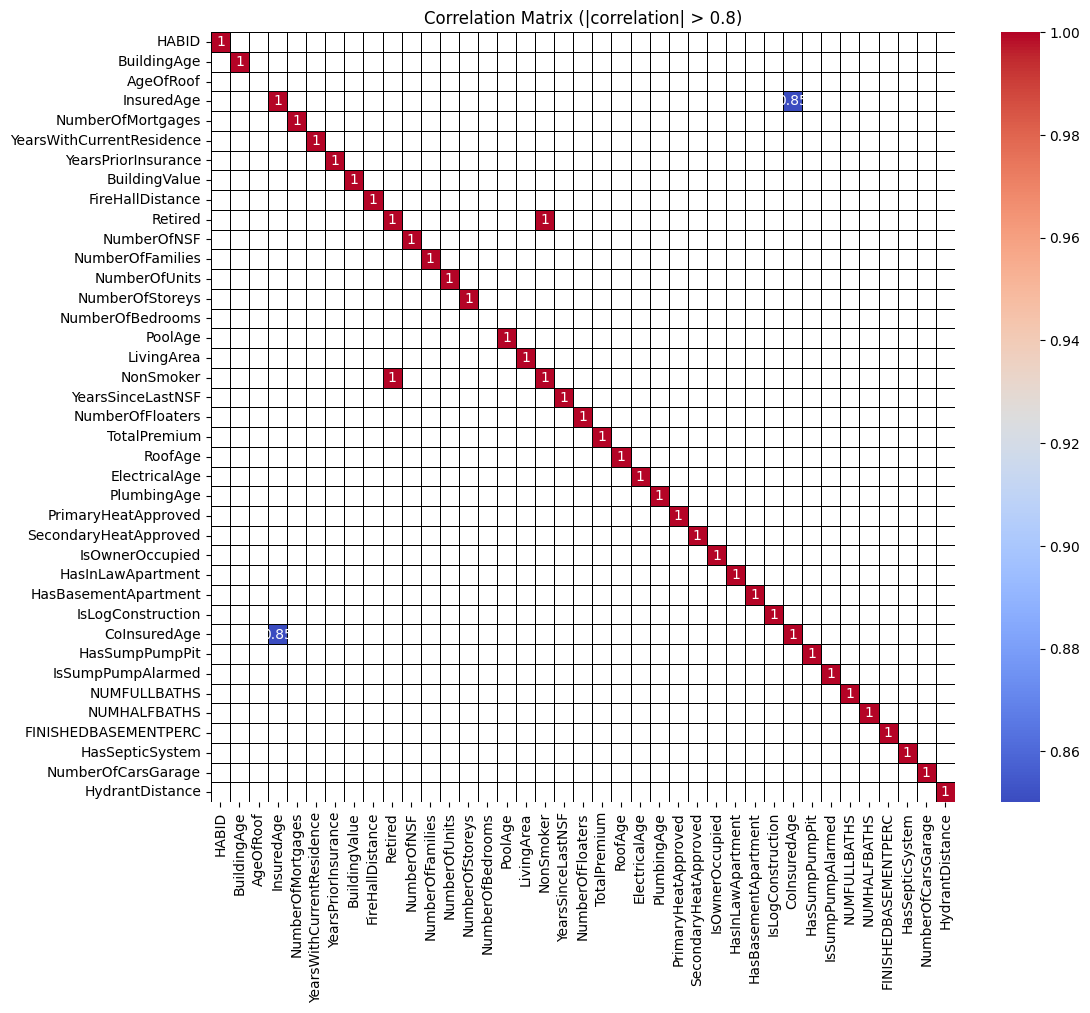

In [81]:
# prompt: plot correlation matrix of df_5 and only show columns with correlation greater than 0.8, along with grid lines and assign correlated columns to a list

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_5 is your DataFrame
# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Filter for correlations greater than 0.8 (excluding self-correlations)
correlated_features = correlation_matrix[abs(correlation_matrix) > 0.8]

# Create a list to store the correlated column pairs
correlated_columns = []

# Iterate through the filtered correlation matrix
for i in range(len(correlated_features)):
    for j in range(i + 1, len(correlated_features)):  # Avoid duplicates
      if abs(correlated_features.iloc[i, j]) > 0.8:
          col1 = correlated_features.columns[i]
          col2 = correlated_features.index[j]

          correlated_columns.append((col1, col2))

# Plot the correlation matrix heatmap with gridlines
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix[abs(correlation_matrix) > 0.8], annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black') # Added grid lines
plt.title('Correlation Matrix (|correlation| > 0.8)')
plt.show()



In [82]:
unrelated_categorical_features


['ProtectionType',
 'SumpPumpType',
 'SumpPumpAuxPower',
 'BackFlowValveTarget',
 'PlumbingType',
 'Occupation',
 'QuoteDate',
 'PostalCode']

In [83]:
# prompt: drop columns in unrelated_categorical_features from df_5 if present

# Check if columns in unrelated_categorical_features exist in df_5
columns_to_drop = [col for col in unrelated_categorical_features if col in df_5.columns]

# Drop the columns if they exist
if columns_to_drop:
    df_5 = df_5.drop(columns=columns_to_drop)


In [84]:
# prompt: Drop CoInsuredAge and Retired Column if present

# Assuming df_1 is your DataFrame
if 'CoInsuredAge' in df_5.columns:
    df_5 = df_5.drop(columns=['CoInsuredAge'])
if 'Retired' in df_1.columns:
    df_5 = df_5.drop(columns=['Retired'])


In [85]:
df_5.head()

HABID    EffDate  BuildingAge  InsuredAge  NumberOfMortgages  \
0  48816840 2024-10-04     6.557439    4.795832                1.0   
1  48816886 2024-10-17     5.477226    6.244998                1.0   
2  48816906 2024-10-11     3.000000    7.211103                1.0   
3  48816910 2024-09-25     6.782330    9.219544                0.0   
4  48816928 2024-10-07     4.582576    7.071068                1.0   

   YearsWithCurrentResidence  YearsPriorInsurance  BuildingValue  \
0                   0.000000             3.741657      12.549847   
1                   2.397895             3.162278      13.460835   
2                   0.000000             3.872983      13.079040   
3                   3.850148             6.782330      13.317170   
4                   2.564949             4.795832      13.728482   

   FireHallDistance  NumberOfNSF  ...  \
0          1.000000            0  ...   
1          2.828427            0  ...   
2          2.236068            0  ...   
3          2.000000            0  ...   
4          2.236068            0  ...   

   GarageType_Attached - Masonry or Masonry/Veneer  GarageType_Basement  \
0                                            False                False   
1                                            False                False   
2                                            False                False   
3                                            False                False   
4                                            False                False   

   GarageType_Basement Under Attached Garage  GarageType_Built-In  \
0                                      False                False   
1                                      False                 True   
2                                      False                 True   
3                                      False                False   
4                                      False                 True   

   GarageType_Carport  GarageType_Carport With Storage  \
0               False                            False   
1               False                            False   
2               False                            False   
3               False                            False   
4               False                            False   

   GarageType_Detached- Frame  GarageType_Detached- Masonry  \
0                       False                         False   
1                       False                         False   
2                       False                         False   
3                       False                         False   
4                       False                         False   

   GarageType_Detached- Masonry or Masonry/ Veneer  GarageType_Other  
0                                            False             False  
1                                            False             False  
2                                            False             False  
3                                            False             False  
4                                            False             False  

[5 rows x 164 columns]

In [86]:
datetime_cols = df_5.select_dtypes(include=['datetime64']).columns
print("Datetime Columns:", datetime_cols)


Datetime Columns: Index(['EffDate'], dtype='object')


In [87]:

# Assuming df_1 is your DataFrame and 'effdate' is the column to drop
if 'EffDate' in df_5.columns:
    df_5 = df_5.drop(columns=['EffDate'])


In [88]:
df_5.head()

HABID  BuildingAge  InsuredAge  NumberOfMortgages  \
0  48816840     6.557439    4.795832                1.0   
1  48816886     5.477226    6.244998                1.0   
2  48816906     3.000000    7.211103                1.0   
3  48816910     6.782330    9.219544                0.0   
4  48816928     4.582576    7.071068                1.0   

   YearsWithCurrentResidence  YearsPriorInsurance  BuildingValue  \
0                   0.000000             3.741657      12.549847   
1                   2.397895             3.162278      13.460835   
2                   0.000000             3.872983      13.079040   
3                   3.850148             6.782330      13.317170   
4                   2.564949             4.795832      13.728482   

   FireHallDistance  NumberOfNSF  NumberOfFamilies  ...  \
0          1.000000            0                 1  ...   
1          2.828427            0                 2  ...   
2          2.236068            0                 1  ...   
3          2.000000            0                 1  ...   
4          2.236068            0                 1  ...   

   GarageType_Attached - Masonry or Masonry/Veneer  GarageType_Basement  \
0                                            False                False   
1                                            False                False   
2                                            False                False   
3                                            False                False   
4                                            False                False   

   GarageType_Basement Under Attached Garage  GarageType_Built-In  \
0                                      False                False   
1                                      False                 True   
2                                      False                 True   
3                                      False                False   
4                                      False                 True   

   GarageType_Carport  GarageType_Carport With Storage  \
0               False                            False   
1               False                            False   
2               False                            False   
3               False                            False   
4               False                            False   

   GarageType_Detached- Frame  GarageType_Detached- Masonry  \
0                       False                         False   
1                       False                         False   
2                       False                         False   
3                       False                         False   
4                       False                         False   

   GarageType_Detached- Masonry or Masonry/ Veneer  GarageType_Other  
0                                            False             False  
1                                            False             False  
2                                            False             False  
3                                            False             False  
4                                            False             False  

[5 rows x 163 columns]

In [ ]:
import seaborn as sns

sns.pairplot(df_5, diag_kind='kde')  # Visualize distributions and relationships
plt.show()

In [90]:
# prompt: drop HABID

# Assuming df_1 is your DataFrame and 'HABID' is the column to drop
if 'HABID' in df_5.columns:
    df_1 = df_5.drop(columns=['HABID'])


In [95]:
# prompt: check if there is any categorical variable in df_5

# Assuming df_5 is defined as in your provided code.

categorical_columns = df_5.select_dtypes(include=['object', 'category']).columns.tolist()

if categorical_columns:
  print("Categorical columns present in df_5:")
  print(categorical_columns)
else:
  print("No categorical columns found in df_5.")


No categorical columns found in df_5.


In [100]:
df_6 = df_5.copy()

In [105]:
from xgboost import XGBRegressor

[0]	validation_0-rmse:0.43965
[1]	validation_0-rmse:0.43613
[2]	validation_0-rmse:0.43354
[3]	validation_0-rmse:0.43010
[4]	validation_0-rmse:0.42672
[5]	validation_0-rmse:0.42335
[6]	validation_0-rmse:0.42005
[7]	validation_0-rmse:0.41676
[8]	validation_0-rmse:0.41351
[9]	validation_0-rmse:0.41136
[10]	validation_0-rmse:0.40817
[11]	validation_0-rmse:0.40501
[12]	validation_0-rmse:0.40189
[13]	validation_0-rmse:0.39978
[14]	validation_0-rmse:0.39671
[15]	validation_0-rmse:0.39370
[16]	validation_0-rmse:0.39072
[17]	validation_0-rmse:0.38777
[18]	validation_0-rmse:0.38487
[19]	validation_0-rmse:0.38199
[20]	validation_0-rmse:0.37914
[21]	validation_0-rmse:0.37632
[22]	validation_0-rmse:0.37354
[23]	validation_0-rmse:0.37077
[24]	validation_0-rmse:0.36873
[25]	validation_0-rmse:0.36602
[26]	validation_0-rmse:0.36336
[27]	validation_0-rmse:0.36161
[28]	validation_0-rmse:0.35900
[29]	validation_0-rmse:0.35643
[30]	validation_0-rmse:0.35389
[31]	validation_0-rmse:0.35137
[32]	validation_0-

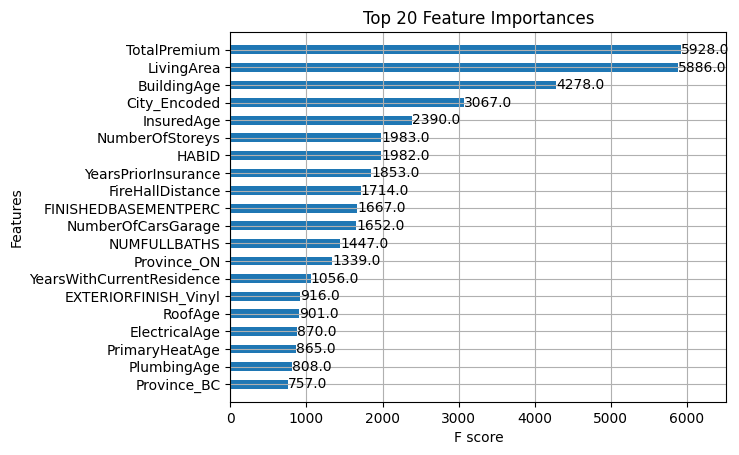

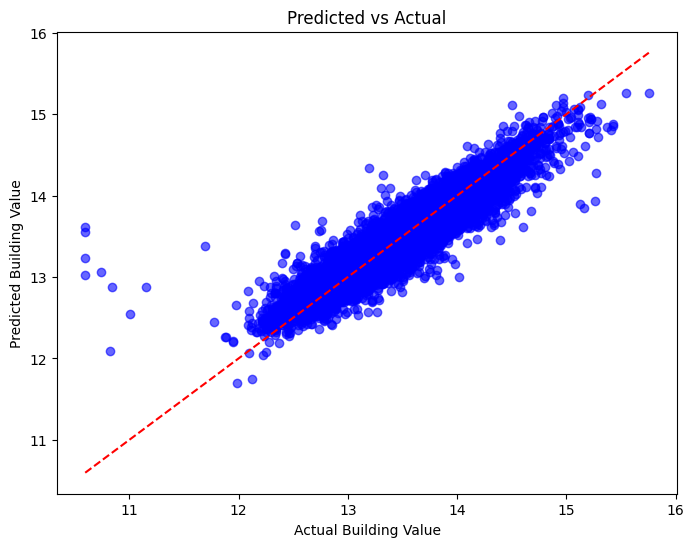

In [120]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into features (X) and target (y)
X = df_6.drop(columns=['BuildingValue'])  # All features except 'BuildingValue'
y = df_6['BuildingValue']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=1000,  # Number of boosting rounds
    learning_rate=0.01,  # Step size shrinking to prevent overfitting
    max_depth=6,  # Depth of each tree
    subsample=0.8,  # Fraction of samples used for fitting each tree
    colsample_bytree=0.8,  # Fraction of features used for each tree
    random_state=42
)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot feature importance
xgb.plot_importance(model, importance_type="weight", max_num_features=20, height=0.5)
plt.title("Top 20 Feature Importances")
plt.show()

# Optional: Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Predicted vs Actual")
plt.xlabel("Actual Building Value")
plt.ylabel("Predicted Building Value")
plt.show()


In [111]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model performance
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = ridge_mse ** 0.5
print(f"Ridge Regression RMSE: {ridge_rmse}")


Ridge Regression RMSE: 0.17852080558831743


In [112]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=0.1)

# Train the model
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model performance
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = lasso_mse ** 0.5
print(f"Lasso Regression RMSE: {lasso_rmse}")


Lasso Regression RMSE: 0.21491400712783923


In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [114]:
# XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)

# Random Forest Regressor
#rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# LightGBM Regressor
#lgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42)

# Linear Regression
#lr_model = LinearRegression()

# Ridge Regression
ridge_model = Ridge(alpha=1.0)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)

# Support Vector Regressor (SVR)
#svr_model = SVR(kernel='rbf')

# Gradient Boosting Regressor (GBR)
#gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)


In [115]:
# Define models in a list
models = [
    ('XGBoost', xgb_model),
    ('Ridge Regression', ridge_model),
    ('Lasso Regression', lasso_model),
]

# Initialize a dictionary to store the results
cv_results = {}

# Loop over each model for cross-validation
for model_name, model in models:
    # Perform cross-validation and compute the negative MSE
    neg_mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)  # 5-fold cross-validation

    # Convert negative MSE to RMSE for better interpretability
    rmse_scores = np.sqrt(-neg_mse_scores)

    # Store the results in the dictionary
    cv_results[model_name] = rmse_scores

# Print out the cross-validation results
for model_name, scores in cv_results.items():
    print(f"{model_name} - Mean RMSE: {np.mean(scores):.4f}, Std RMSE: {np.std(scores):.4f}")


XGBoost - Mean RMSE: 0.1494, Std RMSE: 0.0024
Ridge Regression - Mean RMSE: 0.1750, Std RMSE: 0.0016
Lasso Regression - Mean RMSE: 0.2131, Std RMSE: 0.0018


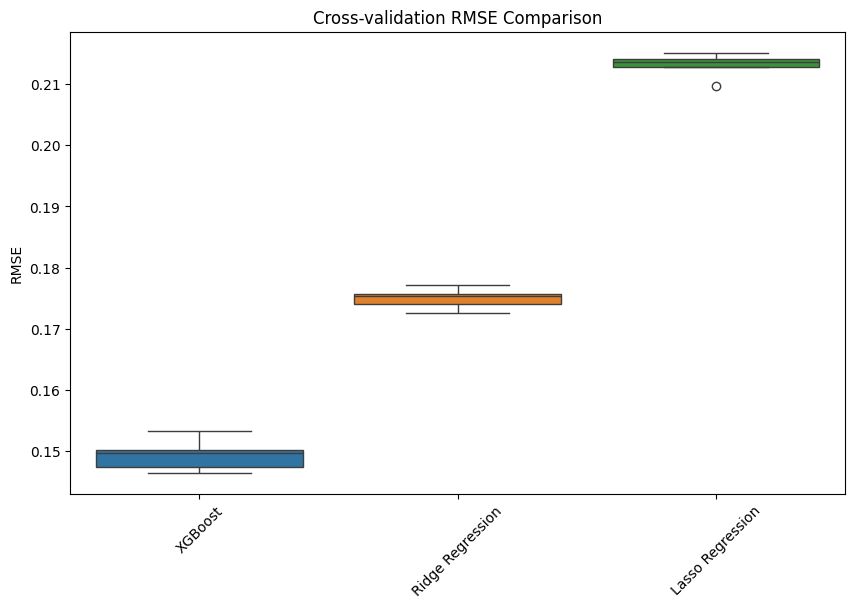

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store the results of cross-validation
cv_results_df = pd.DataFrame(cv_results)

# Boxplot for RMSE
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_results_df)
plt.title('Cross-validation RMSE Comparison')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()


In [117]:
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(model, X, y, title="Learning Curves", cv=5):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # Calculate RMSE from negative MSE
    train_rmse = np.sqrt(-train_scores)
    val_rmse = np.sqrt(-val_scores)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_rmse.mean(axis=1), label="Train RMSE", color="blue", lw=2)
    plt.plot(train_sizes, val_rmse.mean(axis=1), label="Validation RMSE", color="green", lw=2)
    plt.fill_between(train_sizes, train_rmse.mean(axis=1) - train_rmse.std(axis=1),
                     train_rmse.mean(axis=1) + train_rmse.std(axis=1), alpha=0.2, color='blue')
    plt.fill_between(train_sizes, val_rmse.mean(axis=1) - val_rmse.std(axis=1),
                     val_rmse.mean(axis=1) + val_rmse.std(axis=1), alpha=0.2, color='green')
    plt.title(f'{title} - RMSE')
    plt.xlabel('Training Set Size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

# Plot learning curves for each model
plot_learning_curve(xgb_model, X_train, y_train, title="XGBoost Learning Curve")
plot_learning_curve(ridge_model, X_train, y_train, title="Ridge Learning Curve")
plot_learning_curve(lasso_model, X_train, y_train, title="Lasso Learning Curve")


KeyboardInterrupt: 

In [ ]:
import numpy as np

# Function to plot residuals
def plot_residuals(model, X, y, model_name="Model"):
    y_pred = model.predict(X)
    residuals = y - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residual Plot - {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

# Plot residuals for each model
plot_residuals(xgb_model, X_train, y_train, model_name="XGBoost")
plot_residuals(ridge_model, X_train, y_train, model_name="Ridge")
plot_residuals(lasso_model, X_train, y_train, model_name="Lasso")
